# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              VotingClassifier, ExtraTreesClassifier, BaggingClassifier,
                              RandomForestRegressor, GradientBoostingRegressor)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from scipy.stats import randint
import joblib
from google.colab import files
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np
from scipy.stats import randint




In [2]:
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
df.info()
df.head()


Saving DFterbaru (8).csv to DFterbaru (8).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 320 entries, TAHUN to PERSENTASE DEPOT AIR MINUM LAIK HSP
dtypes: float64(317), object(3)
memory usage: 230.1+ KB


,TAHUN,PROVINSI,KOTA/KABUPATEN,LUAS WILAYAH (km2),DESA,KELURAHAN,DESA + KELURAHAN,JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L),JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L + P),JUMLAH KUNJUNGAN RAWAT JALAN KLINIK PRATAMA (L),...,PERSENTASE TFU YANG DILAKUKAN PENGAWASAN SESUAI STANDAR (IKL),JUMLAH JASA BOGA TERDAFTAR,JUMLAH JASA BOGA LAIK HSP,PERSENTASE JASA BOGA LAIK HSP,JUMLAH RESTORAN TERDAFTAR,JUMLAH RESTORAN LAIK HSP,PERSENTASE RESTORAN LAIK HSP,JUMLAH DEPOT AIR MINUM TERDAFTAR,JUMLAH DEPOT AIR MINUM LAIK HSP,PERSENTASE DEPOT AIR MINUM LAIK HSP
0,2020-01-01,KALIMANTAN BARAT,KAB. SAMBAS,6395.0,193.0,0.0,193.0,2366.9,4851.5,6093.8,...,47.6,62.0,37.0,59.7,167.0,72.0,43.1,104.0,54.0,51.9
1,2020-01-01,KALIMANTAN BARAT,KAB. BENGKAYANG,5397.0,122.0,2.0,124.0,2035.9,4148.1,5204.2,...,74.6,25.0,22.0,88.0,248.0,183.0,73.8,78.0,48.0,61.5
2,2020-01-01,KALIMANTAN BARAT,KAB. LANDAK,9909.0,156.0,0.0,156.0,3808.9,7712.7,9664.6,...,55.6,33.0,24.0,72.7,174.0,103.0,59.2,144.0,83.0,57.6
3,2020-01-01,KALIMANTAN BARAT,KAB. MEMPAWAH,1367.0,60.0,7.0,67.0,478.6,999.0,1259.2,...,63.5,2.0,0.0,0.0,132.0,96.0,72.7,122.0,110.0,90.2
4,2020-01-01,KALIMANTAN BARAT,KAB. SANGGAU,12858.0,163.0,6.0,169.0,4973.9,10051.3,12590.0,...,53.0,44.0,30.0,68.2,236.0,175.0,74.2,191.0,88.0,46.1


# Data underStanding

In [3]:
df.info(90)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 320 columns):
 #    Column                                                                                        Dtype  
---   ------                                                                                        -----  
 0    TAHUN                                                                                         object 
 1    PROVINSI                                                                                      object 
 2    KOTA/KABUPATEN                                                                                object 
 3    LUAS WILAYAH (km2)                                                                            float64
 4    DESA                                                                                          float64
 5    KELURAHAN                                                                                     float64
 6    DESA + KELURAHAN          

In [4]:
df

,TAHUN,PROVINSI,KOTA/KABUPATEN,LUAS WILAYAH (km2),DESA,KELURAHAN,DESA + KELURAHAN,JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L),JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L + P),JUMLAH KUNJUNGAN RAWAT JALAN KLINIK PRATAMA (L),...,PERSENTASE TFU YANG DILAKUKAN PENGAWASAN SESUAI STANDAR (IKL),JUMLAH JASA BOGA TERDAFTAR,JUMLAH JASA BOGA LAIK HSP,PERSENTASE JASA BOGA LAIK HSP,JUMLAH RESTORAN TERDAFTAR,JUMLAH RESTORAN LAIK HSP,PERSENTASE RESTORAN LAIK HSP,JUMLAH DEPOT AIR MINUM TERDAFTAR,JUMLAH DEPOT AIR MINUM LAIK HSP,PERSENTASE DEPOT AIR MINUM LAIK HSP
0,2020-01-01,KALIMANTAN BARAT,KAB. SAMBAS,6395.0,193.0,0.0,193.0,2366.9,4851.50,6093.80,...,47.6,62.0,37.000,59.7,167.0,72.0,43.1,104.000,54.00,51.9
1,2020-01-01,KALIMANTAN BARAT,KAB. BENGKAYANG,5397.0,122.0,2.0,124.0,2035.9,4148.10,5204.20,...,74.6,25.0,22.000,88.0,248.0,183.0,73.8,78.000,48.00,61.5
2,2020-01-01,KALIMANTAN BARAT,KAB. LANDAK,9909.0,156.0,0.0,156.0,3808.9,7712.70,9664.60,...,55.6,33.0,24.000,72.7,174.0,103.0,59.2,144.000,83.00,57.6
3,2020-01-01,KALIMANTAN BARAT,KAB. MEMPAWAH,1367.0,60.0,7.0,67.0,478.6,999.00,1259.20,...,63.5,2.0,0.000,0.0,132.0,96.0,72.7,122.000,110.00,90.2
4,2020-01-01,KALIMANTAN BARAT,KAB. SANGGAU,12858.0,163.0,6.0,169.0,4973.9,10051.30,12590.00,...,53.0,44.0,30.000,68.2,236.0,175.0,74.2,191.000,88.00,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2023-01-01,Bali,Klungkung,314.0,53.0,6.0,59.0,315.0,45.33,48.33,...,67.2,16.0,6.000,37.5,44.0,13.0,29.6,16.000,4.00,25.0
88,2023-01-01,Bali,Bangli,526.8,69.0,4.0,73.0,527.8,52.67,54.67,...,93.6,1.0,1.000,100.0,98.0,5.0,5.1,4.000,2.00,50.0
89,2023-01-01,Bali,karangasem,839.3,75.0,3.0,78.0,840.3,55.00,56.50,...,94.1,14.0,12.000,85.7,543.0,212.0,39.0,11.000,1.00,9.1
90,2023-01-01,Bali,Buleleng,1322.7,129.0,19.0,148.0,1323.7,117.67,127.17,...,92.0,99.0,60.375,72.7,329.0,288.0,87.5,92.000,76.00,82.6


In [5]:
df.describe()

,LUAS WILAYAH (km2),DESA,KELURAHAN,DESA + KELURAHAN,JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L),JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L + P),JUMLAH KUNJUNGAN RAWAT JALAN KLINIK PRATAMA (L),JUMLAH KUNJUNGAN RAWAT JALAN KLINIK PRATAMA (P),JUMLAH TEMPAT TIDUR RUMAH SAKIT,JUMLAH PUSKESMAS,...,PERSENTASE TFU YANG DILAKUKAN PENGAWASAN SESUAI STANDAR (IKL),JUMLAH JASA BOGA TERDAFTAR,JUMLAH JASA BOGA LAIK HSP,PERSENTASE JASA BOGA LAIK HSP,JUMLAH RESTORAN TERDAFTAR,JUMLAH RESTORAN LAIK HSP,PERSENTASE RESTORAN LAIK HSP,JUMLAH DEPOT AIR MINUM TERDAFTAR,JUMLAH DEPOT AIR MINUM LAIK HSP,PERSENTASE DEPOT AIR MINUM LAIK HSP
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,5722.885272,114.130435,7.782609,121.021739,6147.115679,5569.215516,6977.249348,8384.275707,457.320815,15.978261,...,69.289239,34.649457,19.521739,63.447826,160.501359,100.398098,58.794348,108.591033,63.154891,59.997826
std,6827.019664,87.245733,8.479874,82.853502,8112.964140,8129.485588,10194.559476,12257.755520,462.769303,5.373885,...,23.320829,30.448351,18.795335,32.264864,160.639366,114.368150,31.560099,89.564154,51.973456,22.963454
min,108.000000,0.000000,0.000000,26.000000,3.720000,33.100000,46.600000,51.330000,0.000000,9.000000,...,11.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,9.100000
25%,500.675000,46.000000,0.000000,59.000000,387.060000,56.747500,63.200000,73.085000,59.500000,11.000000,...,55.400000,13.000000,6.000000,39.625000,36.750000,12.750000,33.750000,44.000000,24.000000,47.525000
50%,1935.410000,87.000000,6.000000,87.000000,1845.950000,339.650000,412.550000,501.370000,379.500000,14.000000,...,70.600000,22.000000,12.000000,72.700000,94.000000,59.500000,59.600000,88.500000,53.000000,60.500000
75%,8549.292500,163.000000,16.000000,169.000000,8942.605000,8280.100000,10375.750000,12471.400000,716.250000,20.000000,...,90.460000,50.250000,27.750000,86.275000,245.000000,168.000000,88.475000,149.750000,86.500000,77.525000
max,20622.218750,338.500000,29.000000,334.000000,21775.922500,20615.128750,25844.575000,31068.872500,1701.375000,28.000000,...,100.000000,106.125000,60.375000,150.000000,557.375000,400.875000,100.000000,308.375000,180.250000,100.000000


# Data Preparation / Preprocessing

Mengubah nama kolom menjadi kode

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 320 entries, TAHUN to PERSENTASE DEPOT AIR MINUM LAIK HSP
dtypes: float64(317), object(3)
memory usage: 230.1+ KB


In [7]:
import pandas as pd
df['TAHUN'] = pd.to_datetime(df['TAHUN'].astype(str))

In [8]:
df

,TAHUN,PROVINSI,KOTA/KABUPATEN,LUAS WILAYAH (km2),DESA,KELURAHAN,DESA + KELURAHAN,JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L),JUMLAH KUNJUNGAN GANGGUAN JIWA PUSKESMAS (L + P),JUMLAH KUNJUNGAN RAWAT JALAN KLINIK PRATAMA (L),...,PERSENTASE TFU YANG DILAKUKAN PENGAWASAN SESUAI STANDAR (IKL),JUMLAH JASA BOGA TERDAFTAR,JUMLAH JASA BOGA LAIK HSP,PERSENTASE JASA BOGA LAIK HSP,JUMLAH RESTORAN TERDAFTAR,JUMLAH RESTORAN LAIK HSP,PERSENTASE RESTORAN LAIK HSP,JUMLAH DEPOT AIR MINUM TERDAFTAR,JUMLAH DEPOT AIR MINUM LAIK HSP,PERSENTASE DEPOT AIR MINUM LAIK HSP
0,2020-01-01,KALIMANTAN BARAT,KAB. SAMBAS,6395.0,193.0,0.0,193.0,2366.9,4851.50,6093.80,...,47.6,62.0,37.000,59.7,167.0,72.0,43.1,104.000,54.00,51.9
1,2020-01-01,KALIMANTAN BARAT,KAB. BENGKAYANG,5397.0,122.0,2.0,124.0,2035.9,4148.10,5204.20,...,74.6,25.0,22.000,88.0,248.0,183.0,73.8,78.000,48.00,61.5
2,2020-01-01,KALIMANTAN BARAT,KAB. LANDAK,9909.0,156.0,0.0,156.0,3808.9,7712.70,9664.60,...,55.6,33.0,24.000,72.7,174.0,103.0,59.2,144.000,83.00,57.6
3,2020-01-01,KALIMANTAN BARAT,KAB. MEMPAWAH,1367.0,60.0,7.0,67.0,478.6,999.00,1259.20,...,63.5,2.0,0.000,0.0,132.0,96.0,72.7,122.000,110.00,90.2
4,2020-01-01,KALIMANTAN BARAT,KAB. SANGGAU,12858.0,163.0,6.0,169.0,4973.9,10051.30,12590.00,...,53.0,44.0,30.000,68.2,236.0,175.0,74.2,191.000,88.00,46.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2023-01-01,Bali,Klungkung,314.0,53.0,6.0,59.0,315.0,45.33,48.33,...,67.2,16.0,6.000,37.5,44.0,13.0,29.6,16.000,4.00,25.0
88,2023-01-01,Bali,Bangli,526.8,69.0,4.0,73.0,527.8,52.67,54.67,...,93.6,1.0,1.000,100.0,98.0,5.0,5.1,4.000,2.00,50.0
89,2023-01-01,Bali,karangasem,839.3,75.0,3.0,78.0,840.3,55.00,56.50,...,94.1,14.0,12.000,85.7,543.0,212.0,39.0,11.000,1.00,9.1
90,2023-01-01,Bali,Buleleng,1322.7,129.0,19.0,148.0,1323.7,117.67,127.17,...,92.0,99.0,60.375,72.7,329.0,288.0,87.5,92.000,76.00,82.6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Columns: 320 entries, TAHUN to PERSENTASE DEPOT AIR MINUM LAIK HSP
dtypes: datetime64[ns](1), float64(317), object(2)
memory usage: 230.1+ KB


#Modeling & Evaluasi


## Perbandingan Beberapa Macam Model dan Indicator Importance
(RFE)


### Test Size 20/80

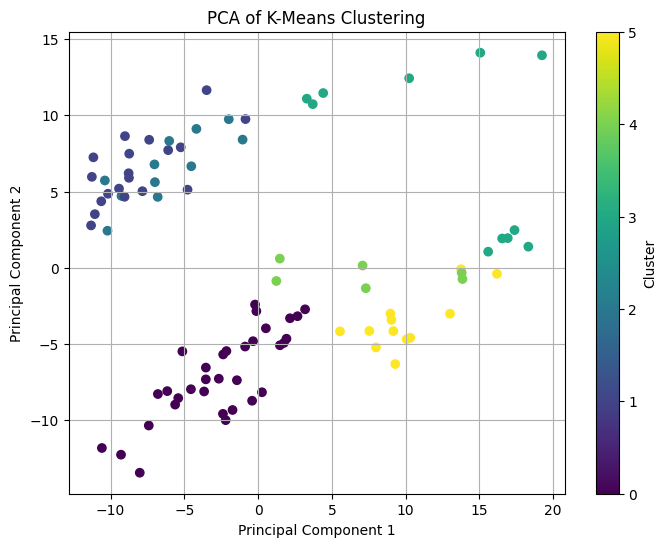

Model: SVM
Test Accuracy: 0.79
Cross Validation Accuracy: 0.74

Model: Random Forest
Test Accuracy: 0.58
Cross Validation Accuracy: 0.36

Model: Decision Tree
Test Accuracy: 0.63
Cross Validation Accuracy: 0.55

Model: Enhanced Random Forest
Test Accuracy: 0.89
Cross Validation Accuracy: 0.88

Accuracy of Enhanced Random Forest: 0.89
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menghapus kolom non-numerik
df_numeric = df.select_dtypes(include=[float, int])  # Hanya ambil kolom numerik

# Skala data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 1. Klusterisasi K-Means
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 2. PCA untuk mengurangi dimensi dan visualisasi hasil kluster
pca = PCA(n_components=2)  # Mengurangi ke 2 komponen
X_pca = pca.fit_transform(df_scaled)

# Menampilkan hasil kluster dan komponen PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# 3. Simpan hasil kluster untuk digunakan sebagai target y
y = df['Cluster']

X = df_numeric.drop(columns=['Cluster'])  # Hapus kolom 'Cluster'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'SVM': SVC(kernel='linear', C=0.001, random_state=42),  # Reduced C for more regularization
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=20, min_samples_leaf=20, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=20, random_state=42)
}

results_df = pd.DataFrame(columns=['Indicator'])

feature_names = X.columns
for name, model in models.items():

    rfe = RFE(estimator=model, n_features_to_select=60)
    rfe.fit(X_train_scaled, y_train)
    rfe_rankings = rfe.ranking_

    model.fit(X_train_scaled, y_train)

    if name == 'SVM':
        importance_values = model.coef_[0]
    else:
        importance_values = model.feature_importances_

    model_results_df = pd.DataFrame({
        'Indicator': feature_names,
        'Coef/Importance': importance_values,
        'RFE Ranking': rfe_rankings,
    })

    model_results_df.rename(columns={'Coef/Importance': f'Coef/Importance ({name})',
                                     'RFE Ranking': f'RFE Ranking ({name})'}, inplace=True)

    if results_df.empty:
        model_results_df['Original Index'] = np.arange(len(feature_names))
        results_df = model_results_df
    else:
        results_df = results_df.merge(model_results_df.drop(columns=['Original Index'], errors='ignore'), on='Indicator', how='outer')

top_features_rfe = results_df.nsmallest(60, 'RFE Ranking (Random Forest)')['Indicator']
results_df = results_df[results_df['Indicator'].isin(top_features_rfe)]
results_df.fillna(0, inplace=True)

param_dist = {
    'n_estimators': [50, 100, 150],  # Reduce the number of trees
    'max_depth': [5, 10, 15, None],  # Limit max depth
    'min_samples_split': [5, 10, 15],  # Increase min_samples_split
    'min_samples_leaf': [2, 3, 4],  # Increase min_samples_leaf
    'max_features': ['sqrt', 'log2'],
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train_scaled, y_train)
models['Enhanced Random Forest'] = random_search_rf.best_estimator_
rfe = RFE(estimator=models['Enhanced Random Forest'], n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
rfe_rankings = rfe.ranking_

models['Enhanced Random Forest'].fit(X_train_scaled, y_train)

importance_values = models['Enhanced Random Forest'].feature_importances_

enhanced_results_df = pd.DataFrame({
    'Indicator': feature_names,
    'Coef/Importance (Enhanced Random Forest)': importance_values,
    'RFE Ranking (Enhanced Random Forest)': rfe_rankings,
})

results_df = results_df.merge(enhanced_results_df, on='Indicator', how='outer')
results_df.fillna(0, inplace=True)

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Model: {name}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Cross Validation Accuracy: {cross_val_scores.mean():.2f}\n")

y_pred_enhanced_rf = models['Enhanced Random Forest'].predict(X_test_scaled)
accuracy_enhanced_rf = accuracy_score(y_test, y_pred_enhanced_rf)
print(f"Accuracy of Enhanced Random Forest: {accuracy_enhanced_rf:.2f}")
print(f"Best Parameters: {random_search_rf.best_params_}")


In [12]:
df.to_csv('df.csv', index=False)

In [13]:
top_100 = results_df.sort_values(by='RFE Ranking (Enhanced Random Forest)').head(100)
results_df_100 = top_100.copy()
print(results_df_100)

                                             Indicator  Coef/Importance (SVM)  \
232  PERSENTASE BALITA BERAT BADAN KURANG(BB/U) ATA...               0.000000   
234  PERSENTASE BALITA GIZI KURANG (BB/TB: < 2 S.D....               0.000000   
111                                 JUMLAH LAHIR HIDUP               0.000000   
235      PERSENTASE BALITA PENDEK (TB/U) ATAU STUNTING               0.000000   
212      PERSENTASE  BAYI DIIMUNISASI HB0 < 24 JAM (P)               0.000000   
..                                                 ...                    ...   
34                        BAYI DIIMUNISASI LENGKAP (P)               0.000000   
154                       JUMLAH SEMUA KASUS TBC (L+P)               0.000000   
79                               JUMLAH IBU HAMIL Td2+               0.000000   
25                      BAYI DIIMUNISASI DPTHBHib4 (P)               0.000000   
115                            JUMLAH PEMERIKSAAAN IVA              -0.001042   

     RFE Ranking (SVM)  Ori

In [14]:
results_df1 = results_df_100

In [15]:
results_df1

,Indicator,Coef/Importance (SVM),RFE Ranking (SVM),Original Index,Coef/Importance (Random Forest),RFE Ranking (Random Forest),Coef/Importance (Decision Tree),RFE Ranking (Decision Tree),Coef/Importance (Enhanced Random Forest),RFE Ranking (Enhanced Random Forest)
232,PERSENTASE BALITA BERAT BADAN KURANG(BB/U) ATA...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034275,1
234,PERSENTASE BALITA GIZI KURANG (BB/TB: < 2 S.D....,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.022132,1
111,JUMLAH LAHIR HIDUP,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015603,1
235,PERSENTASE BALITA PENDEK (TB/U) ATAU STUNTING,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032641,1
212,PERSENTASE BAYI DIIMUNISASI HB0 < 24 JAM (P),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.006776,1
...,...,...,...,...,...,...,...,...,...,...
34,BAYI DIIMUNISASI LENGKAP (P),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002208,87
154,JUMLAH SEMUA KASUS TBC (L+P),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004975,88
79,JUMLAH IBU HAMIL Td2+,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005587,89
25,BAYI DIIMUNISASI DPTHBHib4 (P),0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.011590,90


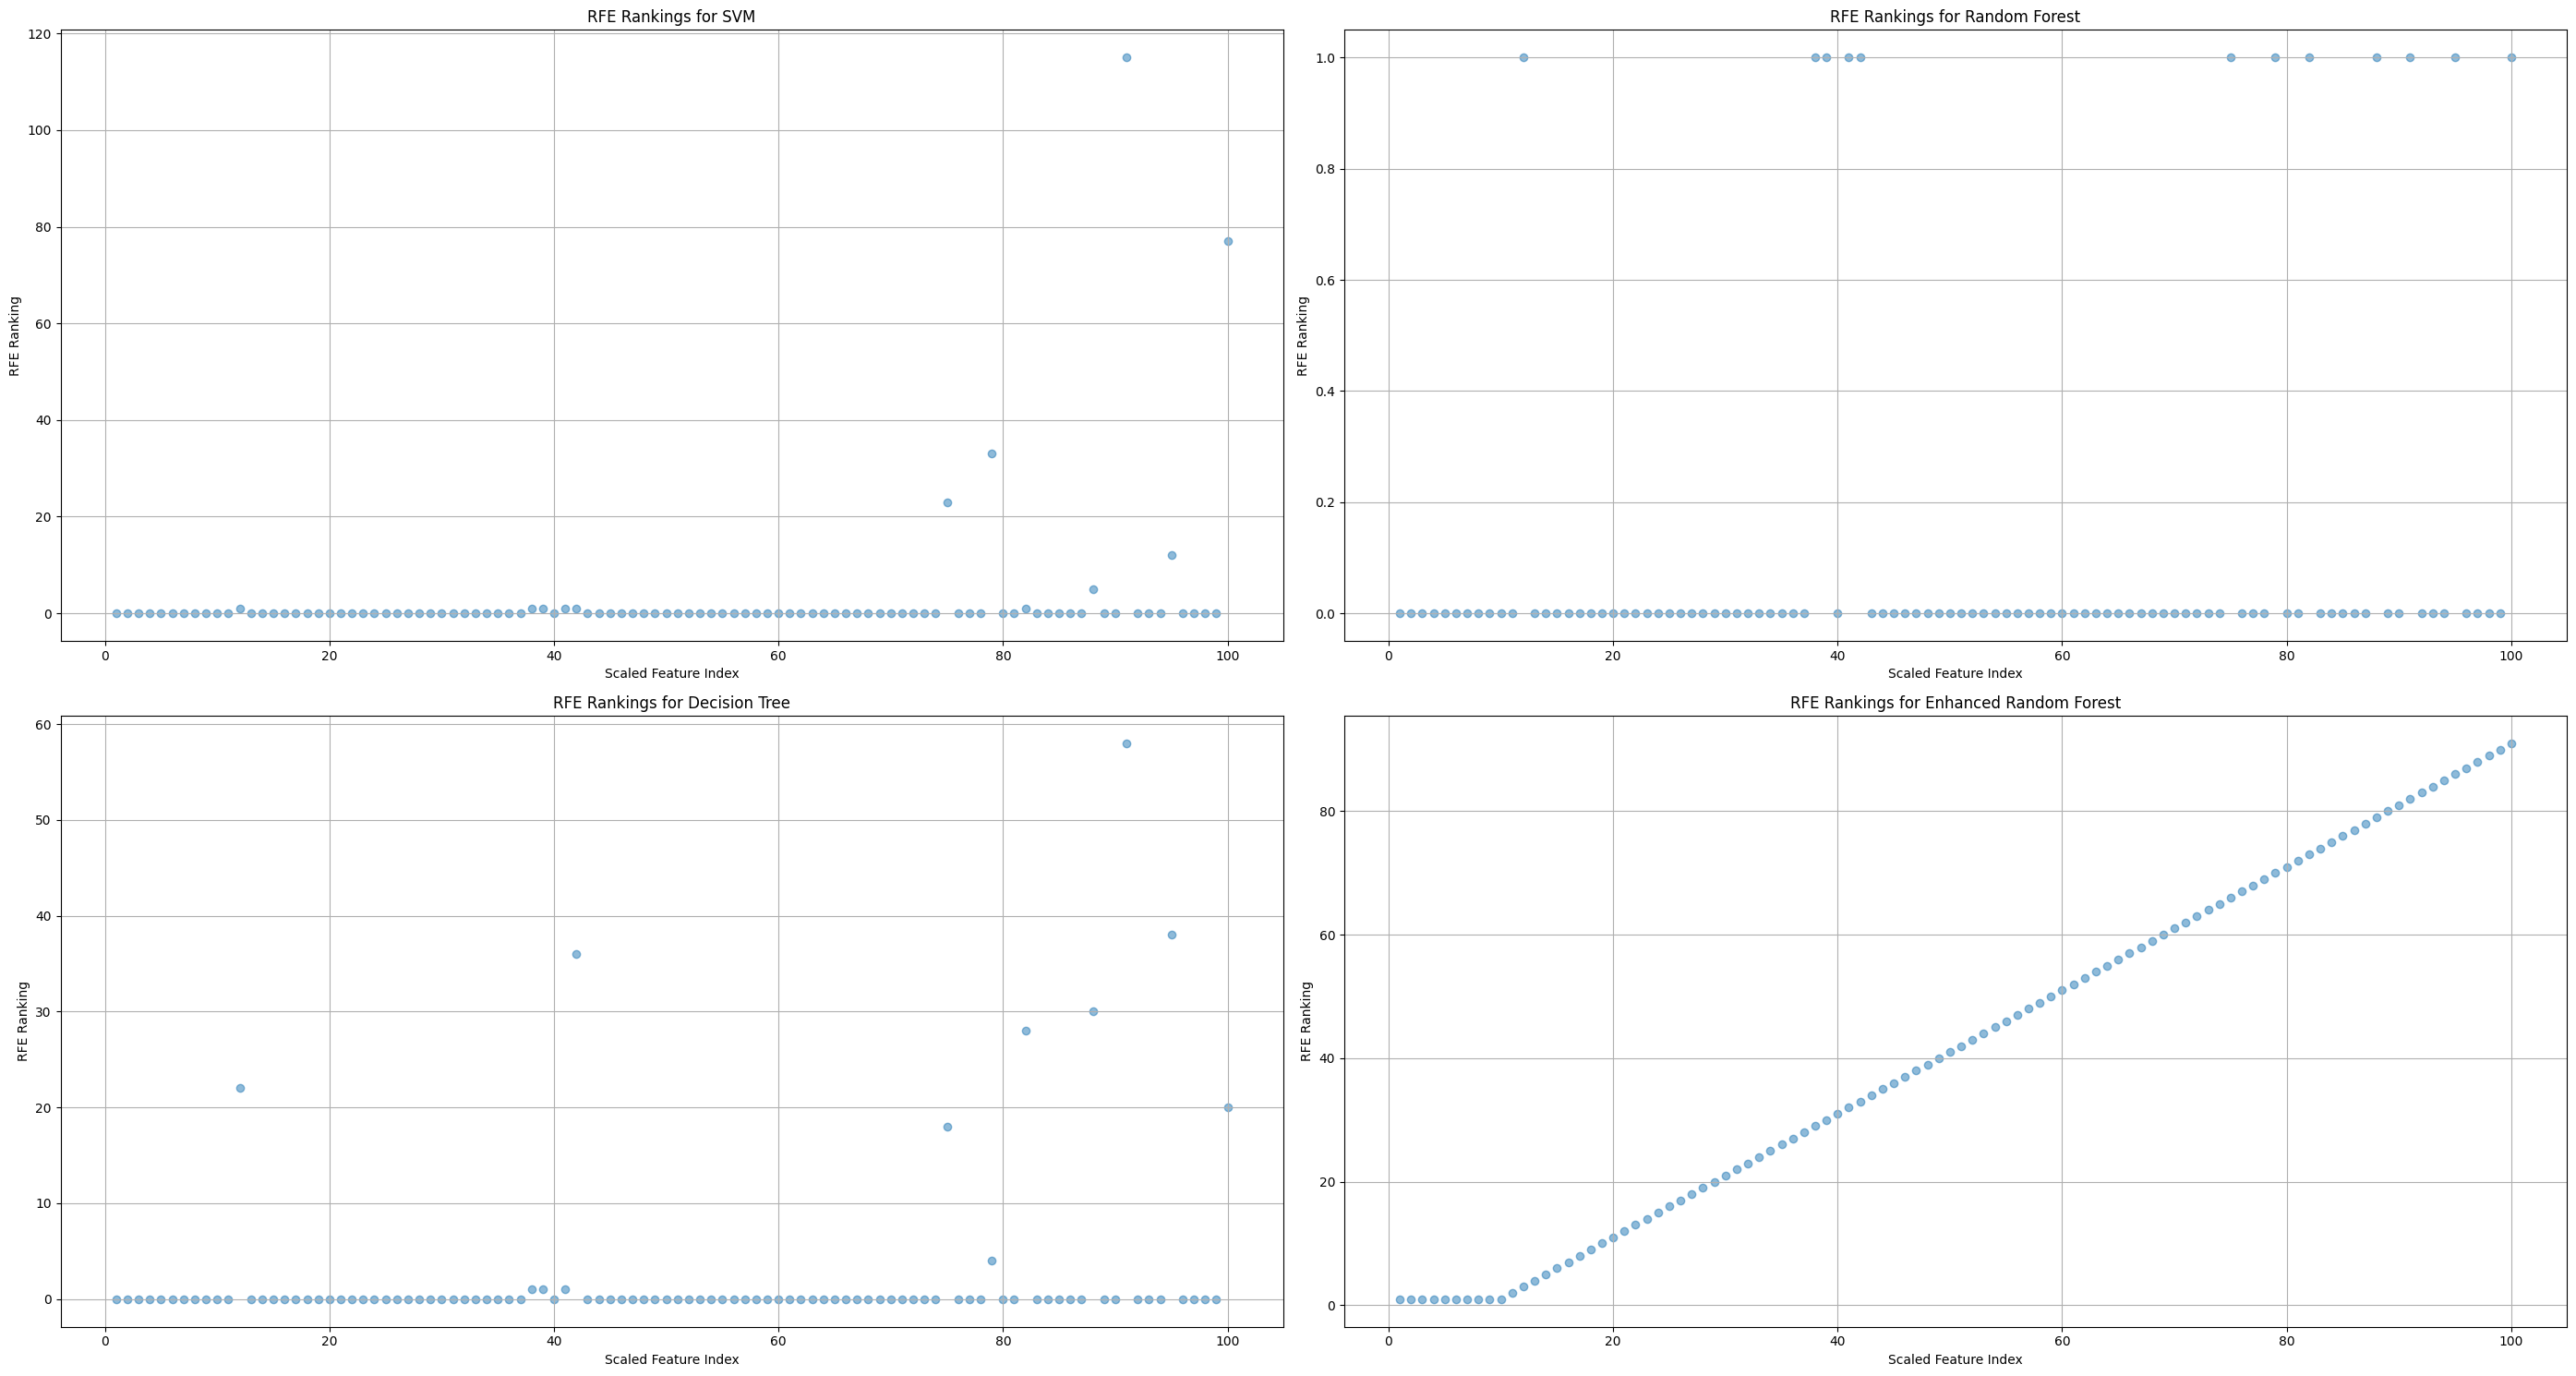

                    Model  Accuracy  Cross Validation Accuracy
0                     SVM  0.789474                   0.740000
1           Random Forest  0.578947                   0.356190
2           Decision Tree  0.631579                   0.548571
3  Enhanced Random Forest  0.894737                   0.878095


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

accuracies = {}
plt.figure(figsize=(28, 15))

for i, (name, model) in enumerate(models.items()):
    rfe_col = f'RFE Ranking ({name})'

    if rfe_col in results_df1.columns:
        rfe_rankings = results_df1[rfe_col].values

        plt.subplot(2, 2, i + 1)  # Corrected subplot here
        plt.scatter(np.linspace(1, 100, len(rfe_rankings)), rfe_rankings, alpha=0.5)  # Scale x-axis
        plt.title(f"RFE Rankings for {name}")
        plt.xlabel('Scaled Feature Index')  # Label for scaled index
        plt.ylabel('RFE Ranking')
        plt.grid(True)

plt.tight_layout()
plt.show()

def evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test):
    evaluation_results = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

        evaluation_results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Cross Validation Accuracy': cv_accuracy
        })

    evaluation_df = pd.DataFrame(evaluation_results)
    return evaluation_df

evaluation_df = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)
print(evaluation_df)


In [17]:
def calculate_bobot_and_kategori(rfe_ranking):
    if rfe_ranking < 20:
        return 5, 'Mutlak'
    elif 20 <= rfe_ranking <= 40:
        return 4, 'Penting'
    elif 40 < rfe_ranking <= 60:
        return 3, 'Perlu'
    elif 60 < rfe_ranking <= 80:
        return 2, 'Kurang Perlu'
    else:
        return 1, 'Tidak Perlu'

results_df1['Bobot'], results_df1['Kategori Bobot'] = zip(*results_df1['RFE Ranking (Enhanced Random Forest)'].apply(calculate_bobot_and_kategori))
new_df = results_df1[['Indicator', 'Coef/Importance (Enhanced Random Forest)','RFE Ranking (Enhanced Random Forest)', 'Bobot', 'Kategori Bobot']]
new_df

,Indicator,Coef/Importance (Enhanced Random Forest),RFE Ranking (Enhanced Random Forest),Bobot,Kategori Bobot
232,PERSENTASE BALITA BERAT BADAN KURANG(BB/U) ATA...,0.034275,1,5,Mutlak
234,PERSENTASE BALITA GIZI KURANG (BB/TB: < 2 S.D....,0.022132,1,5,Mutlak
111,JUMLAH LAHIR HIDUP,0.015603,1,5,Mutlak
235,PERSENTASE BALITA PENDEK (TB/U) ATAU STUNTING,0.032641,1,5,Mutlak
212,PERSENTASE BAYI DIIMUNISASI HB0 < 24 JAM (P),0.006776,1,5,Mutlak
...,...,...,...,...,...
34,BAYI DIIMUNISASI LENGKAP (P),0.002208,87,1,Tidak Perlu
154,JUMLAH SEMUA KASUS TBC (L+P),0.004975,88,1,Tidak Perlu
79,JUMLAH IBU HAMIL Td2+,0.005587,89,1,Tidak Perlu
25,BAYI DIIMUNISASI DPTHBHib4 (P),0.011590,90,1,Tidak Perlu


In [18]:
new_df

,Indicator,Coef/Importance (Enhanced Random Forest),RFE Ranking (Enhanced Random Forest),Bobot,Kategori Bobot
232,PERSENTASE BALITA BERAT BADAN KURANG(BB/U) ATA...,0.034275,1,5,Mutlak
234,PERSENTASE BALITA GIZI KURANG (BB/TB: < 2 S.D....,0.022132,1,5,Mutlak
111,JUMLAH LAHIR HIDUP,0.015603,1,5,Mutlak
235,PERSENTASE BALITA PENDEK (TB/U) ATAU STUNTING,0.032641,1,5,Mutlak
212,PERSENTASE BAYI DIIMUNISASI HB0 < 24 JAM (P),0.006776,1,5,Mutlak
...,...,...,...,...,...
34,BAYI DIIMUNISASI LENGKAP (P),0.002208,87,1,Tidak Perlu
154,JUMLAH SEMUA KASUS TBC (L+P),0.004975,88,1,Tidak Perlu
79,JUMLAH IBU HAMIL Td2+,0.005587,89,1,Tidak Perlu
25,BAYI DIIMUNISASI DPTHBHib4 (P),0.011590,90,1,Tidak Perlu


In [19]:
excel_file = 'results.xlsx'
new_df.to_excel(excel_file, index=False)
files.download(excel_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Test Size 25/75

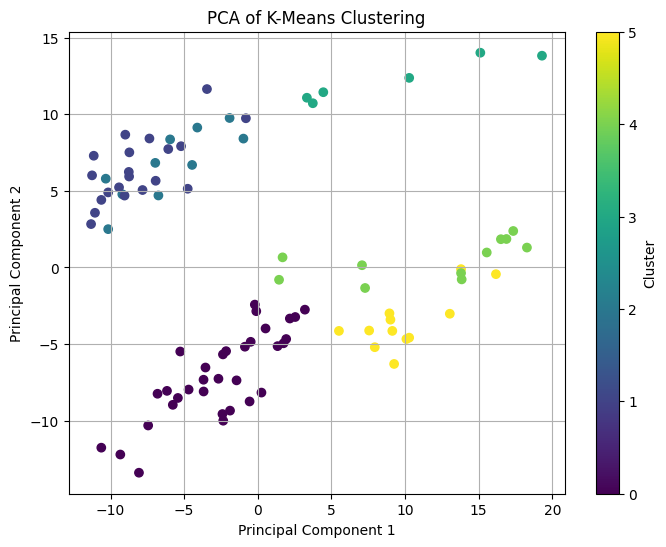

Model: SVM
Test Accuracy: 0.74
Cross Validation Accuracy: 0.70

Model: Random Forest
Test Accuracy: 0.57
Cross Validation Accuracy: 0.36

Model: Decision Tree
Test Accuracy: 0.57
Cross Validation Accuracy: 0.55

Model: Enhanced Random Forest
Test Accuracy: 0.87
Cross Validation Accuracy: 0.91

Accuracy of Enhanced Random Forest: 0.87
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}


In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=[float, int])  # Hanya ambil kolom numerik

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 1. Klusterisasi K-Means
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 2. PCA untuk mengurangi dimensi dan visualisasi hasil kluster
pca = PCA(n_components=2)  # Mengurangi ke 2 komponen
X_pca = pca.fit_transform(df_scaled)

# Menampilkan hasil kluster dan komponen PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# 3. Simpan hasil kluster untuk digunakan sebagai target y
y = df['Cluster']

X = df_numeric.drop(columns=['Cluster'])  # Hapus kolom 'Cluster'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'SVM': SVC(kernel='linear', C=0.001, random_state=42),  # Reduced C for more regularization
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=20, min_samples_leaf=20, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=20, random_state=42)
}
results_df = pd.DataFrame(columns=['Indicator'])

feature_names = X.columns
for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=60)
    rfe.fit(X_train_scaled, y_train)
    rfe_rankings = rfe.ranking_
    model.fit(X_train_scaled, y_train)

    if name == 'SVM':
        importance_values = model.coef_[0]
    else:
        importance_values = model.feature_importances_

    model_results_df = pd.DataFrame({
        'Indicator': feature_names,
        'Coef/Importance': importance_values,
        'RFE Ranking': rfe_rankings,
    })

    model_results_df.rename(columns={'Coef/Importance': f'Coef/Importance ({name})',
                                     'RFE Ranking': f'RFE Ranking ({name})'}, inplace=True)

    if results_df.empty:
        model_results_df['Original Index'] = np.arange(len(feature_names))
        results_df = model_results_df
    else:
        results_df = results_df.merge(model_results_df.drop(columns=['Original Index'], errors='ignore'), on='Indicator', how='outer')

top_features_rfe = results_df.nsmallest(60, 'RFE Ranking (Random Forest)')['Indicator']
results_df = results_df[results_df['Indicator'].isin(top_features_rfe)]
results_df.fillna(0, inplace=True)

param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_train_scaled, y_train)
models['Enhanced Random Forest'] = random_search_rf.best_estimator_
rfe = RFE(estimator=models['Enhanced Random Forest'], n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
rfe_rankings = rfe.ranking_

models['Enhanced Random Forest'].fit(X_train_scaled, y_train)
importance_values = models['Enhanced Random Forest'].feature_importances_

enhanced_results_df = pd.DataFrame({
    'Indicator': feature_names,
    'Coef/Importance (Enhanced Random Forest)': importance_values,
    'RFE Ranking (Enhanced Random Forest)': rfe_rankings,
})

results_df2 = results_df.merge(enhanced_results_df, on='Indicator', how='outer')
results_df2.fillna(0, inplace=True)

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Model: {name}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Cross Validation Accuracy: {cross_val_scores.mean():.2f}\n")

y_pred_enhanced_rf = models['Enhanced Random Forest'].predict(X_test_scaled)
accuracy_enhanced_rf = accuracy_score(y_test, y_pred_enhanced_rf)
print(f"Accuracy of Enhanced Random Forest: {accuracy_enhanced_rf:.2f}")
print(f"Best Parameters: {random_search_rf.best_params_}")


In [21]:
top_100 = results_df2.sort_values(by='RFE Ranking (Enhanced Random Forest)').head(100)

results_df_100_2 = top_100.copy()

print(results_df_100_2)

                                             Indicator  Coef/Importance (SVM)  \
232  PERSENTASE BALITA BERAT BADAN KURANG(BB/U) ATA...                    0.0   
272                         PERSENTASE PESERTA KB AKDR                    0.0   
110       JUMLAH KUNJUNGAN NEONATAL 3 KALI (KN1) (L+P)                    0.0   
55                                   JUMLAH BADUTA (P)                    0.0   
77                                 JUMLAH IBU BERSALIN                    0.0   
..                                                 ...                    ...   
296       SEKOLAH SMA/MAI MENDAPAT PELAYANAN KESEHATAN                    0.0   
264  PERSENTASE PENDERITA HIPERTENSI MENDAPAT PELAY...                    0.0   
227  PERSENTASE ANAK BALITA (1259 BULAN)  MENDAPAT ...                    0.0   
52     JUMLAH ANAK BALITA (1259 BULAN)  MENDAPAT VIT A                    0.0   
139                           JUMLAH PESERTA KB SUNTIK                    0.0   

     RFE Ranking (SVM)  Ori

In [22]:
results_df2 = results_df_100_2

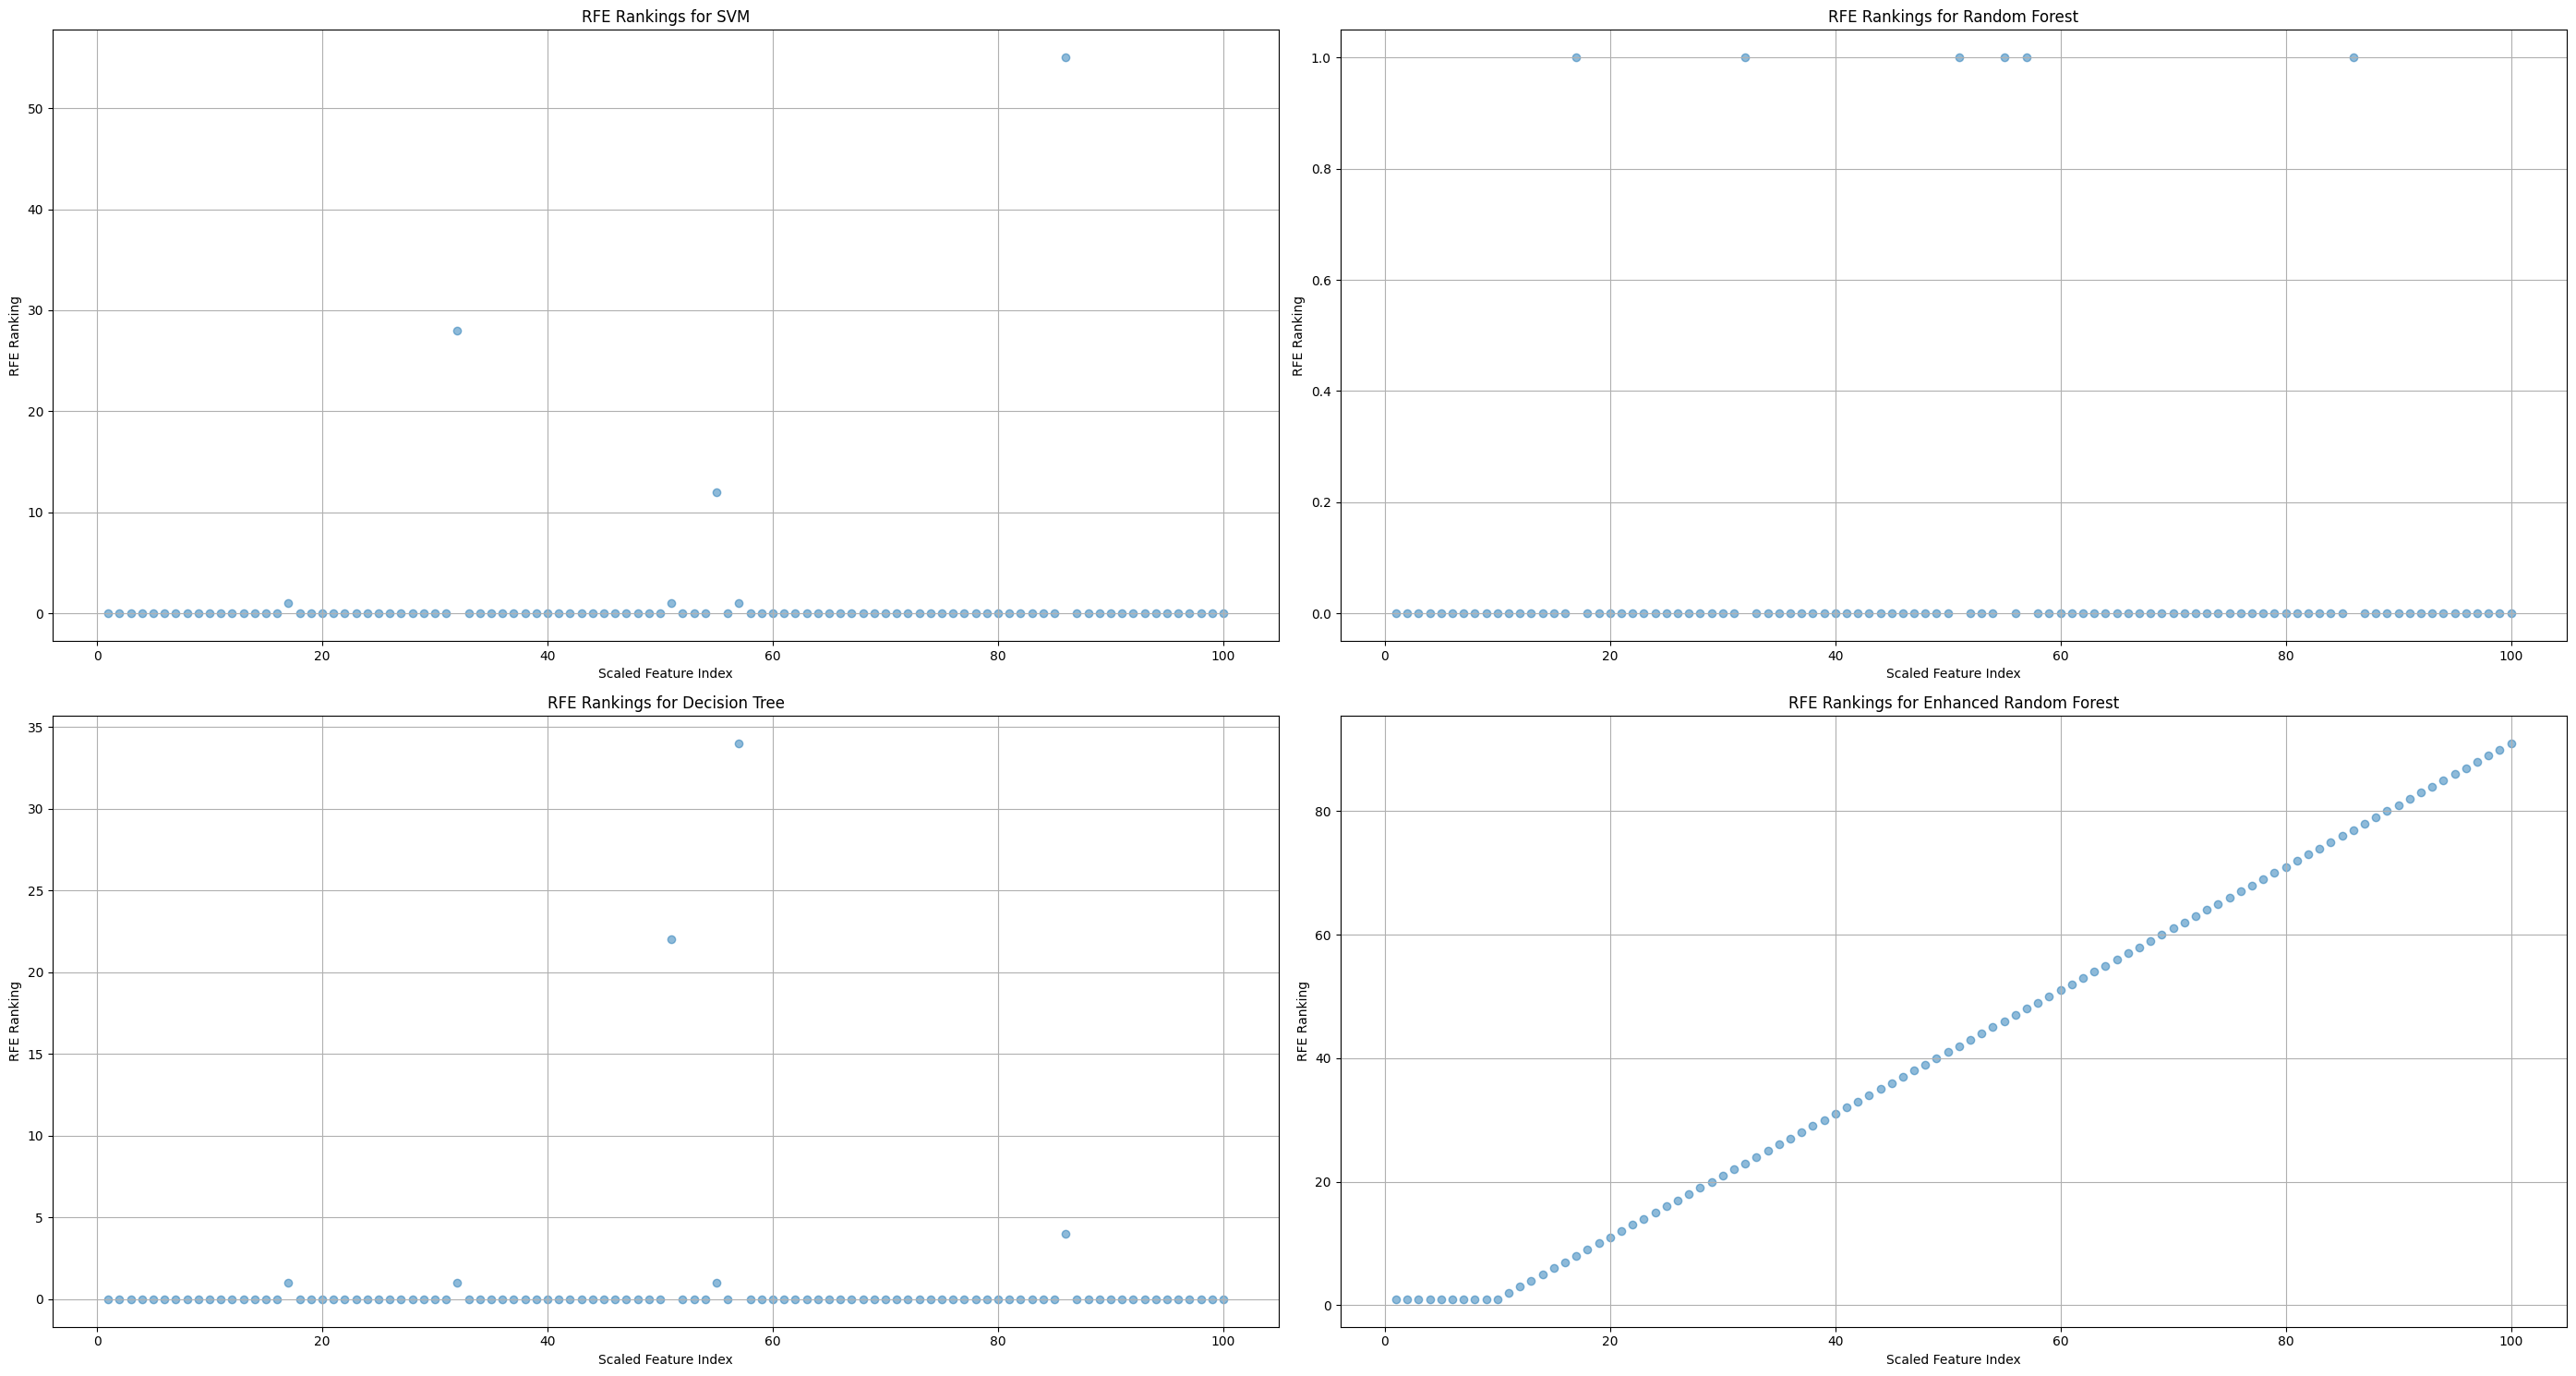

                    Model  Accuracy  Cross Validation Accuracy
0                     SVM  0.739130                   0.696703
1           Random Forest  0.565217                   0.362637
2           Decision Tree  0.565217                   0.551648
3  Enhanced Random Forest  0.869565                   0.913187


In [23]:
accuracies = {}
plt.figure(figsize=(28, 15))

for i, (name, model) in enumerate(models.items()):
    rfe_col = f'RFE Ranking ({name})'

    if rfe_col in results_df2.columns:
        rfe_rankings = results_df2[rfe_col].values

        plt.subplot(2, 2, i + 1)  # Corrected subplot here
        plt.scatter(np.linspace(1, 100, len(rfe_rankings)), rfe_rankings, alpha=0.5)  # Scale x-axis
        plt.title(f"RFE Rankings for {name}")
        plt.xlabel('Scaled Feature Index')  # Label for scaled index
        plt.ylabel('RFE Ranking')
        plt.grid(True)

plt.tight_layout()
plt.show()

def evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test):
    evaluation_results = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

        evaluation_results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Cross Validation Accuracy': cv_accuracy
        })

    evaluation_df = pd.DataFrame(evaluation_results)
    return evaluation_df

evaluation_df = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)
print(evaluation_df)


In [24]:
results_df2

,Indicator,Coef/Importance (SVM),RFE Ranking (SVM),Original Index,Coef/Importance (Random Forest),RFE Ranking (Random Forest),Coef/Importance (Decision Tree),RFE Ranking (Decision Tree),Coef/Importance (Enhanced Random Forest),RFE Ranking (Enhanced Random Forest)
232,PERSENTASE BALITA BERAT BADAN KURANG(BB/U) ATA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015185,1
272,PERSENTASE PESERTA KB AKDR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003929,1
110,JUMLAH KUNJUNGAN NEONATAL 3 KALI (KN1) (L+P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005324,1
55,JUMLAH BADUTA (P),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008768,1
77,JUMLAH IBU BERSALIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007579,1
...,...,...,...,...,...,...,...,...,...,...
296,SEKOLAH SMA/MAI MENDAPAT PELAYANAN KESEHATAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001451,87
264,PERSENTASE PENDERITA HIPERTENSI MENDAPAT PELAY...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004707,88
227,PERSENTASE ANAK BALITA (1259 BULAN) MENDAPAT ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001560,89
52,JUMLAH ANAK BALITA (1259 BULAN) MENDAPAT VIT A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005413,90


In [25]:
def calculate_bobot_and_kategori(rfe_ranking):
    if rfe_ranking < 20:
        return 5, 'Mutlak'
    elif 20 <= rfe_ranking <= 40:
        return 4, 'Penting'
    elif 40 < rfe_ranking <= 60:
        return 3, 'Perlu'
    elif 60 < rfe_ranking <= 80:
        return 2, 'Kurang Perlu'
    else:
        return 1, 'Tidak Perlu'

results_df2['Bobot'], results_df2['Kategori Bobot'] = zip(*results_df2['RFE Ranking (Enhanced Random Forest)'].apply(calculate_bobot_and_kategori))
new_df = results_df2[['Indicator', 'Coef/Importance (Enhanced Random Forest)','RFE Ranking (Enhanced Random Forest)', 'Bobot', 'Kategori Bobot']]
new_df

,Indicator,Coef/Importance (Enhanced Random Forest),RFE Ranking (Enhanced Random Forest),Bobot,Kategori Bobot
232,PERSENTASE BALITA BERAT BADAN KURANG(BB/U) ATA...,0.015185,1,5,Mutlak
272,PERSENTASE PESERTA KB AKDR,0.003929,1,5,Mutlak
110,JUMLAH KUNJUNGAN NEONATAL 3 KALI (KN1) (L+P),0.005324,1,5,Mutlak
55,JUMLAH BADUTA (P),0.008768,1,5,Mutlak
77,JUMLAH IBU BERSALIN,0.007579,1,5,Mutlak
...,...,...,...,...,...
296,SEKOLAH SMA/MAI MENDAPAT PELAYANAN KESEHATAN,0.001451,87,1,Tidak Perlu
264,PERSENTASE PENDERITA HIPERTENSI MENDAPAT PELAY...,0.004707,88,1,Tidak Perlu
227,PERSENTASE ANAK BALITA (1259 BULAN) MENDAPAT ...,0.001560,89,1,Tidak Perlu
52,JUMLAH ANAK BALITA (1259 BULAN) MENDAPAT VIT A,0.005413,90,1,Tidak Perlu


In [28]:
excel_file = 'results2.xlsx'
new_df.to_excel(excel_file, index=False)
files.download(excel_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Test Size 30/70

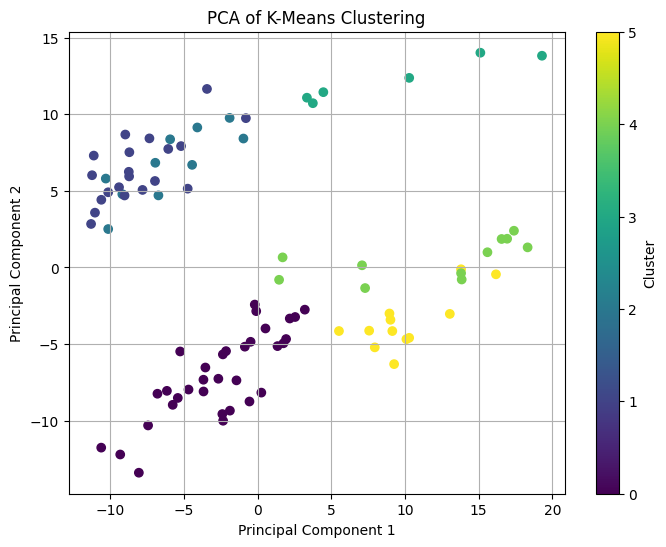

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Model: SVM
Test Accuracy: 0.82
Cross Validation Accuracy: 0.66

Model: Random Forest
Test Accuracy: 0.57
Cross Validation Accuracy: 0.36

Model: Decision Tree
Test Accuracy: 0.57
Cross Validation Accuracy: 0.56

Model: Enhanced Random Forest
Test Accuracy: 0.93
Cross Validation Accuracy: 0.87

Accuracy of Enhanced Random Forest: 0.93
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


In [29]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=[float, int])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

y = df['Cluster']

X = df_numeric.drop(columns=['Cluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'SVM': SVC(kernel='linear', C=0.001, random_state=42),  # Reduced C for more regularization
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=20, min_samples_leaf=20, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=20, random_state=42)
}

results_df = pd.DataFrame(columns=['Indicator'])
feature_names = X.columns
for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=60)
    rfe.fit(X_train_scaled, y_train)
    rfe_rankings = rfe.ranking_
    model.fit(X_train_scaled, y_train)

    if name == 'SVM':
        importance_values = model.coef_[0]
    else:
        importance_values = model.feature_importances_

    model_results_df = pd.DataFrame({
        'Indicator': feature_names,
        'Coef/Importance': importance_values,
        'RFE Ranking': rfe_rankings,
    })

    model_results_df.rename(columns={'Coef/Importance': f'Coef/Importance ({name})',
                                     'RFE Ranking': f'RFE Ranking ({name})'}, inplace=True)

    if results_df.empty:
        model_results_df['Original Index'] = np.arange(len(feature_names))
        results_df = model_results_df
    else:
        results_df = results_df.merge(model_results_df.drop(columns=['Original Index'], errors='ignore'), on='Indicator', how='outer')

top_features_rfe = results_df.nsmallest(60, 'RFE Ranking (Random Forest)')['Indicator']
results_df = results_df[results_df['Indicator'].isin(top_features_rfe)]
results_df.fillna(0, inplace=True)

param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_train_scaled, y_train)
models['Enhanced Random Forest'] = random_search_rf.best_estimator_
rfe = RFE(estimator=models['Enhanced Random Forest'], n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
rfe_rankings = rfe.ranking_

models['Enhanced Random Forest'].fit(X_train_scaled, y_train)
importance_values = models['Enhanced Random Forest'].feature_importances_

enhanced_results_df = pd.DataFrame({
    'Indicator': feature_names,
    'Coef/Importance (Enhanced Random Forest)': importance_values,
    'RFE Ranking (Enhanced Random Forest)': rfe_rankings,
})

results_df3 = results_df.merge(enhanced_results_df, on='Indicator', how='outer')
results_df3.fillna(0, inplace=True)

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Model: {name}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Cross Validation Accuracy: {cross_val_scores.mean():.2f}\n")

y_pred_enhanced_rf = models['Enhanced Random Forest'].predict(X_test_scaled)
accuracy_enhanced_rf = accuracy_score(y_test, y_pred_enhanced_rf)
print(f"Accuracy of Enhanced Random Forest: {accuracy_enhanced_rf:.2f}")
print(f"Best Parameters: {random_search_rf.best_params_}")


In [30]:
top_100 = results_df3.sort_values(by='RFE Ranking (Enhanced Random Forest)').head(100)

results_df_100_3 = top_100.copy()

print(results_df_100_3)

                                             Indicator  Coef/Importance (SVM)  \
187                     PELAYANAN KESEHATAN BAYI (L+P)                0.00000   
55                                   JUMLAH BADUTA (P)                0.00000   
128                 JUMLAH PESERTA DIDIK KELAS 1 SD/MI                0.00000   
111                                 JUMLAH LAHIR HIDUP                0.00000   
234  PERSENTASE BALITA GIZI KURANG (BB/TB: < 2 S.D....                0.00000   
..                                                 ...                    ...   
135                              JUMLAH PESERTA KB MOP                0.00000   
209       PERSENTASE  BAYI DIIMUNISASI HB0 17 HARI (P)                0.00000   
33                        BAYI DIIMUNISASI LENGKAP (L)                0.00000   
286  PERSENTASE TFU YANG DILAKUKAN PENGAWASAN SESUA...               -0.01218   
237            PERSENTASE BAYI BARU LAHIR MENDAPAT IMD                0.00000   

     RFE Ranking (SVM)  Ori

In [31]:
results_df3 = results_df_100_3

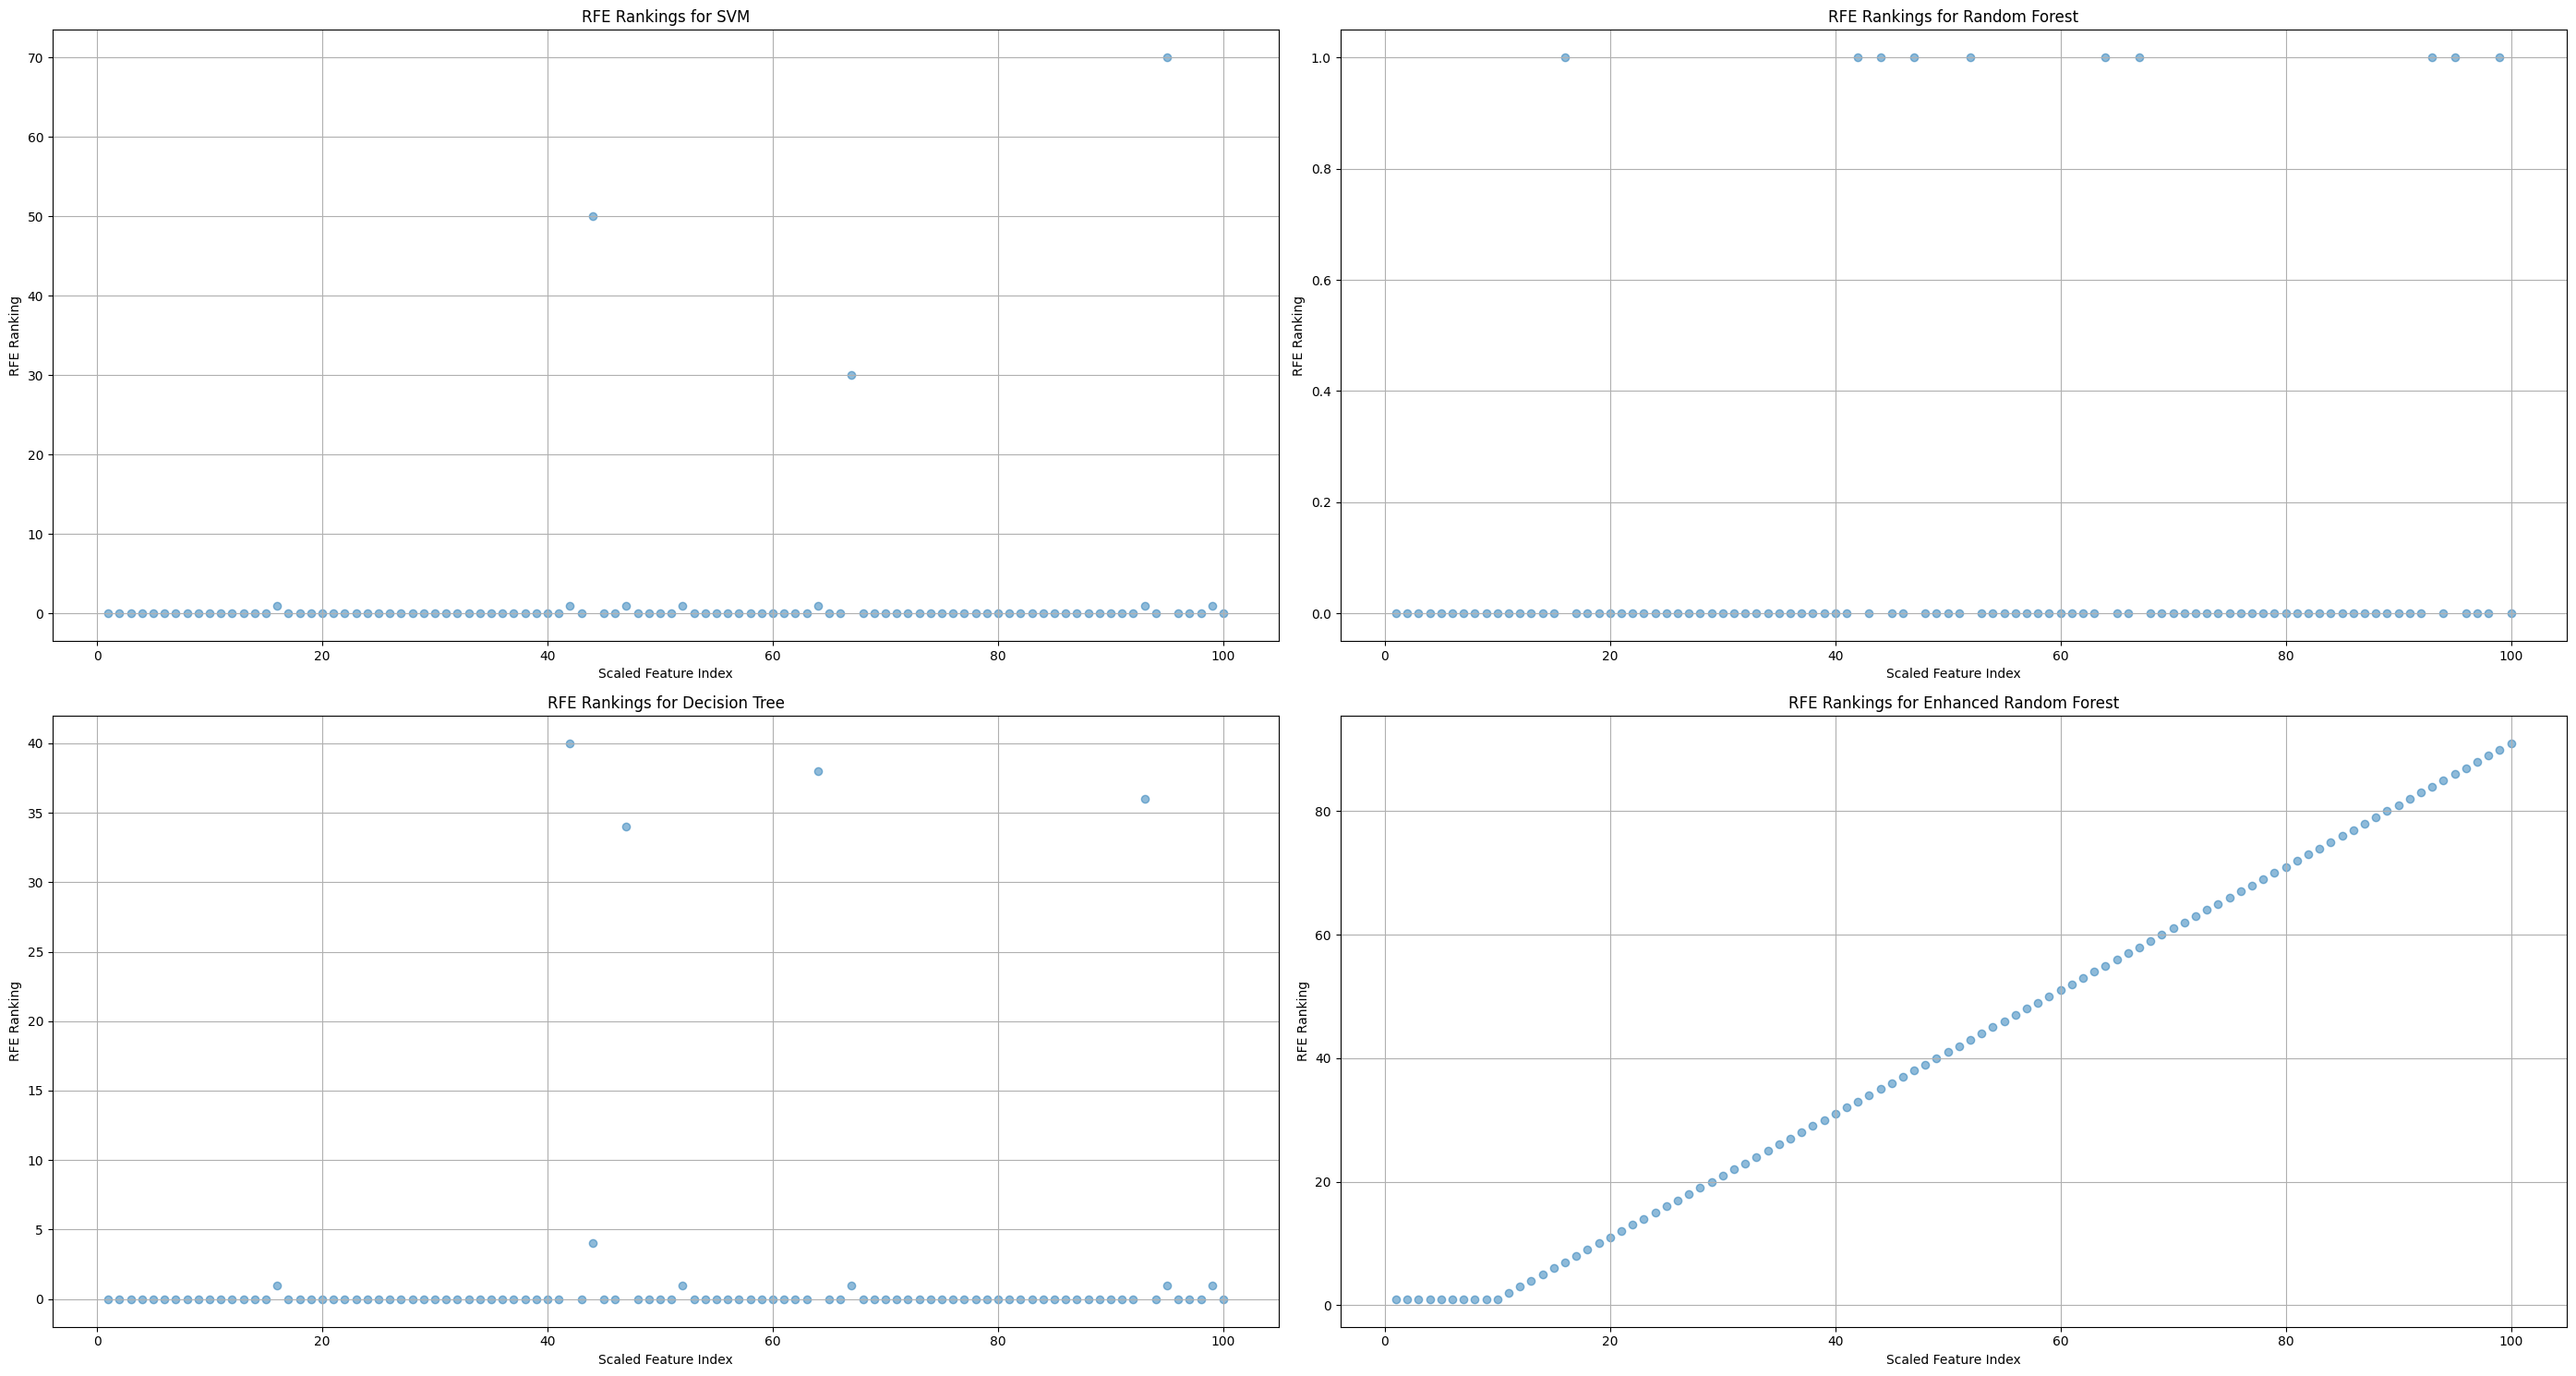

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


                    Model  Accuracy  Cross Validation Accuracy
0                     SVM  0.821429                   0.655128
1           Random Forest  0.571429                   0.358974
2           Decision Tree  0.571429                   0.562821
3  Enhanced Random Forest  0.928571                   0.874359


In [32]:
accuracies = {}
plt.figure(figsize=(28, 15))

for i, (name, model) in enumerate(models.items()):
    rfe_col = f'RFE Ranking ({name})'

    if rfe_col in results_df3.columns:
        rfe_rankings = results_df3[rfe_col].values

        plt.subplot(2, 2, i + 1)  # Corrected subplot here
        plt.scatter(np.linspace(1, 100, len(rfe_rankings)), rfe_rankings, alpha=0.5)  # Scale x-axis
        plt.title(f"RFE Rankings for {name}")
        plt.xlabel('Scaled Feature Index')  # Label for scaled index
        plt.ylabel('RFE Ranking')
        plt.grid(True)

plt.tight_layout()
plt.show()

def evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test):
    evaluation_results = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

        evaluation_results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Cross Validation Accuracy': cv_accuracy
        })

    evaluation_df = pd.DataFrame(evaluation_results)
    return evaluation_df

evaluation_df = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)
print(evaluation_df)


In [33]:
results_df3

,Indicator,Coef/Importance (SVM),RFE Ranking (SVM),Original Index,Coef/Importance (Random Forest),RFE Ranking (Random Forest),Coef/Importance (Decision Tree),RFE Ranking (Decision Tree),Coef/Importance (Enhanced Random Forest),RFE Ranking (Enhanced Random Forest)
187,PELAYANAN KESEHATAN BAYI (L+P),0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.006050,1
55,JUMLAH BADUTA (P),0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.006799,1
128,JUMLAH PESERTA DIDIK KELAS 1 SD/MI,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.008586,1
111,JUMLAH LAHIR HIDUP,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.008312,1
234,PERSENTASE BALITA GIZI KURANG (BB/TB: < 2 S.D....,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.016124,1
...,...,...,...,...,...,...,...,...,...,...
135,JUMLAH PESERTA KB MOP,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.006098,87
209,PERSENTASE BAYI DIIMUNISASI HB0 17 HARI (P),0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.004566,88
33,BAYI DIIMUNISASI LENGKAP (L),0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.001067,89
286,PERSENTASE TFU YANG DILAKUKAN PENGAWASAN SESUA...,-0.01218,1.0,299.0,0.0,1.0,0.0,1.0,0.003226,90


In [34]:
def calculate_bobot_and_kategori(rfe_ranking):
    if rfe_ranking < 20:
        return 5, 'Mutlak'
    elif 20 <= rfe_ranking <= 40:
        return 4, 'Penting'
    elif 40 < rfe_ranking <= 60:
        return 3, 'Perlu'
    elif 60 < rfe_ranking <= 80:
        return 2, 'Kurang Perlu'
    else:
        return 1, 'Tidak Perlu'

results_df3['Bobot'], results_df3['Kategori Bobot'] = zip(*results_df3['RFE Ranking (Enhanced Random Forest)'].apply(calculate_bobot_and_kategori))
new_df = results_df3[['Indicator', 'Coef/Importance (Enhanced Random Forest)','RFE Ranking (Enhanced Random Forest)', 'Bobot', 'Kategori Bobot']]
new_df

,Indicator,Coef/Importance (Enhanced Random Forest),RFE Ranking (Enhanced Random Forest),Bobot,Kategori Bobot
187,PELAYANAN KESEHATAN BAYI (L+P),0.006050,1,5,Mutlak
55,JUMLAH BADUTA (P),0.006799,1,5,Mutlak
128,JUMLAH PESERTA DIDIK KELAS 1 SD/MI,0.008586,1,5,Mutlak
111,JUMLAH LAHIR HIDUP,0.008312,1,5,Mutlak
234,PERSENTASE BALITA GIZI KURANG (BB/TB: < 2 S.D....,0.016124,1,5,Mutlak
...,...,...,...,...,...
135,JUMLAH PESERTA KB MOP,0.006098,87,1,Tidak Perlu
209,PERSENTASE BAYI DIIMUNISASI HB0 17 HARI (P),0.004566,88,1,Tidak Perlu
33,BAYI DIIMUNISASI LENGKAP (L),0.001067,89,1,Tidak Perlu
286,PERSENTASE TFU YANG DILAKUKAN PENGAWASAN SESUA...,0.003226,90,1,Tidak Perlu


In [35]:
excel_file = 'results3.xlsx'
new_df.to_excel(excel_file, index=False)
files.download(excel_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Perbandingan Beberapa Macam Model Enhanced Random Forest dengan Indicator Importance(RFE)

### Test Size 20/80

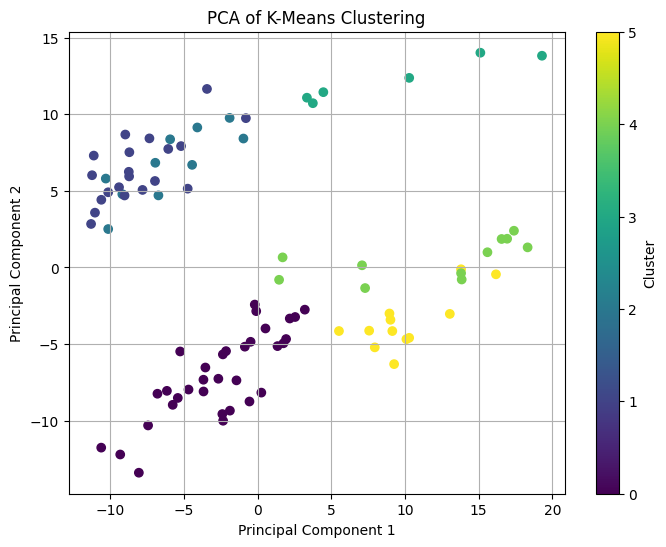

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
<ipython-input-36-60ba96c7157e>:131: FutureWa

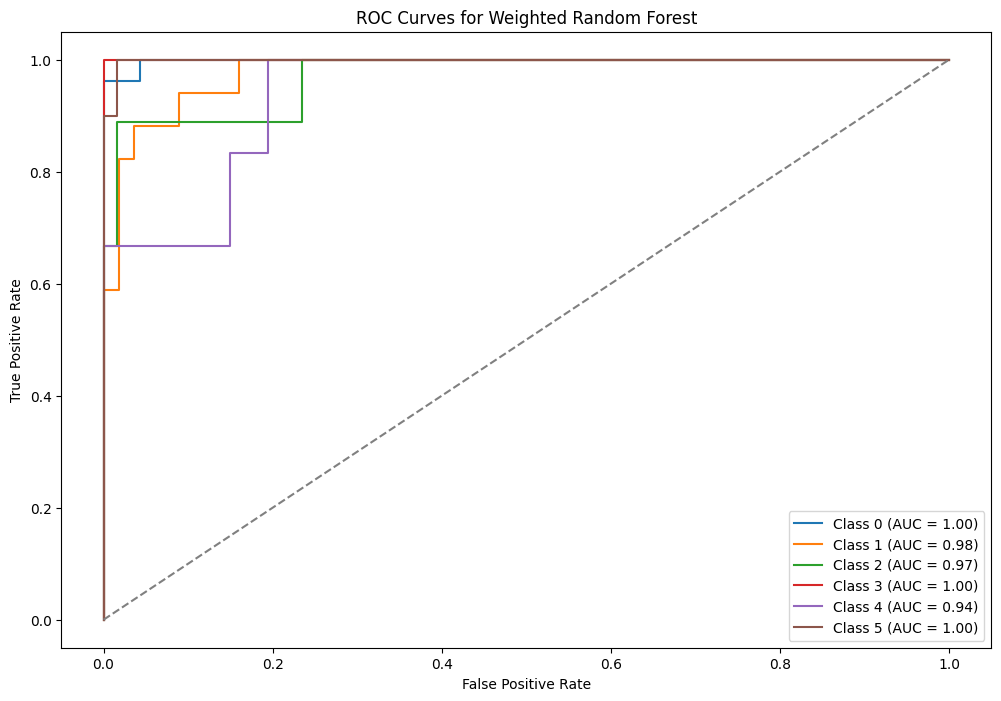

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


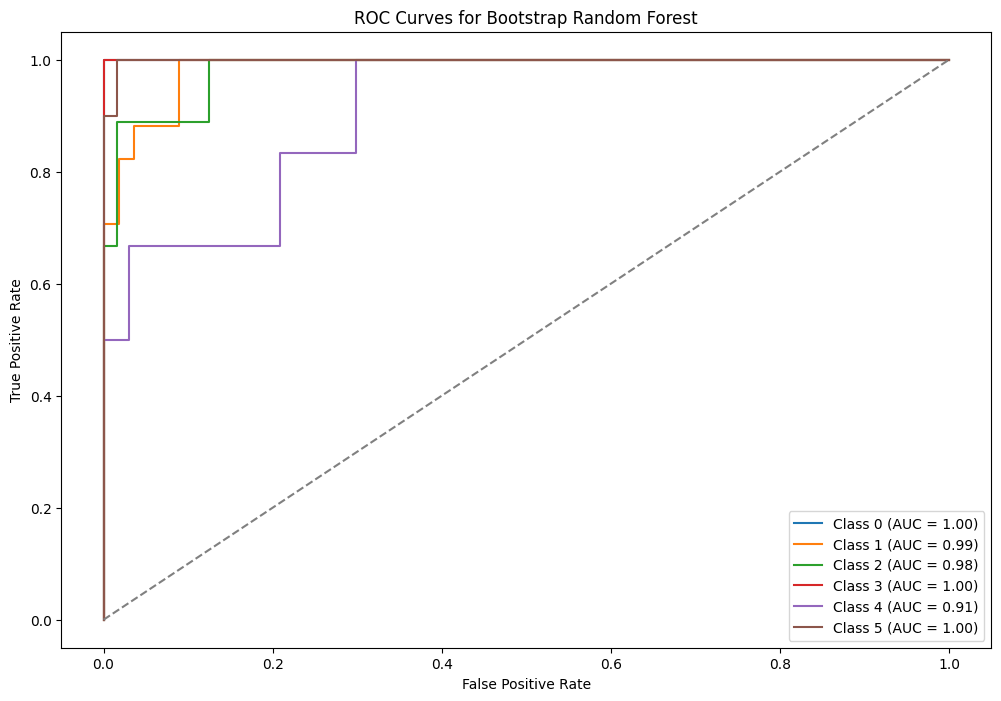

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


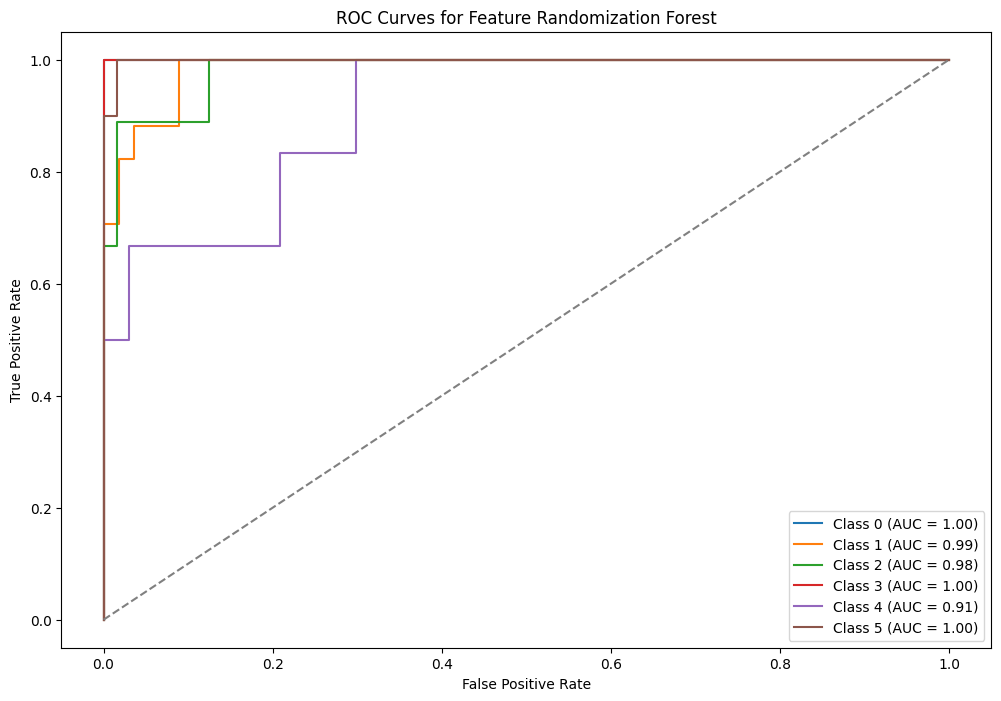

                          Model  Accuracy  F1 Score
0        Weighted Random Forest  0.902857  0.845544
1       Bootstrap Random Forest  0.890476  0.631011
2  Feature Randomization Forest  0.890476  0.631011


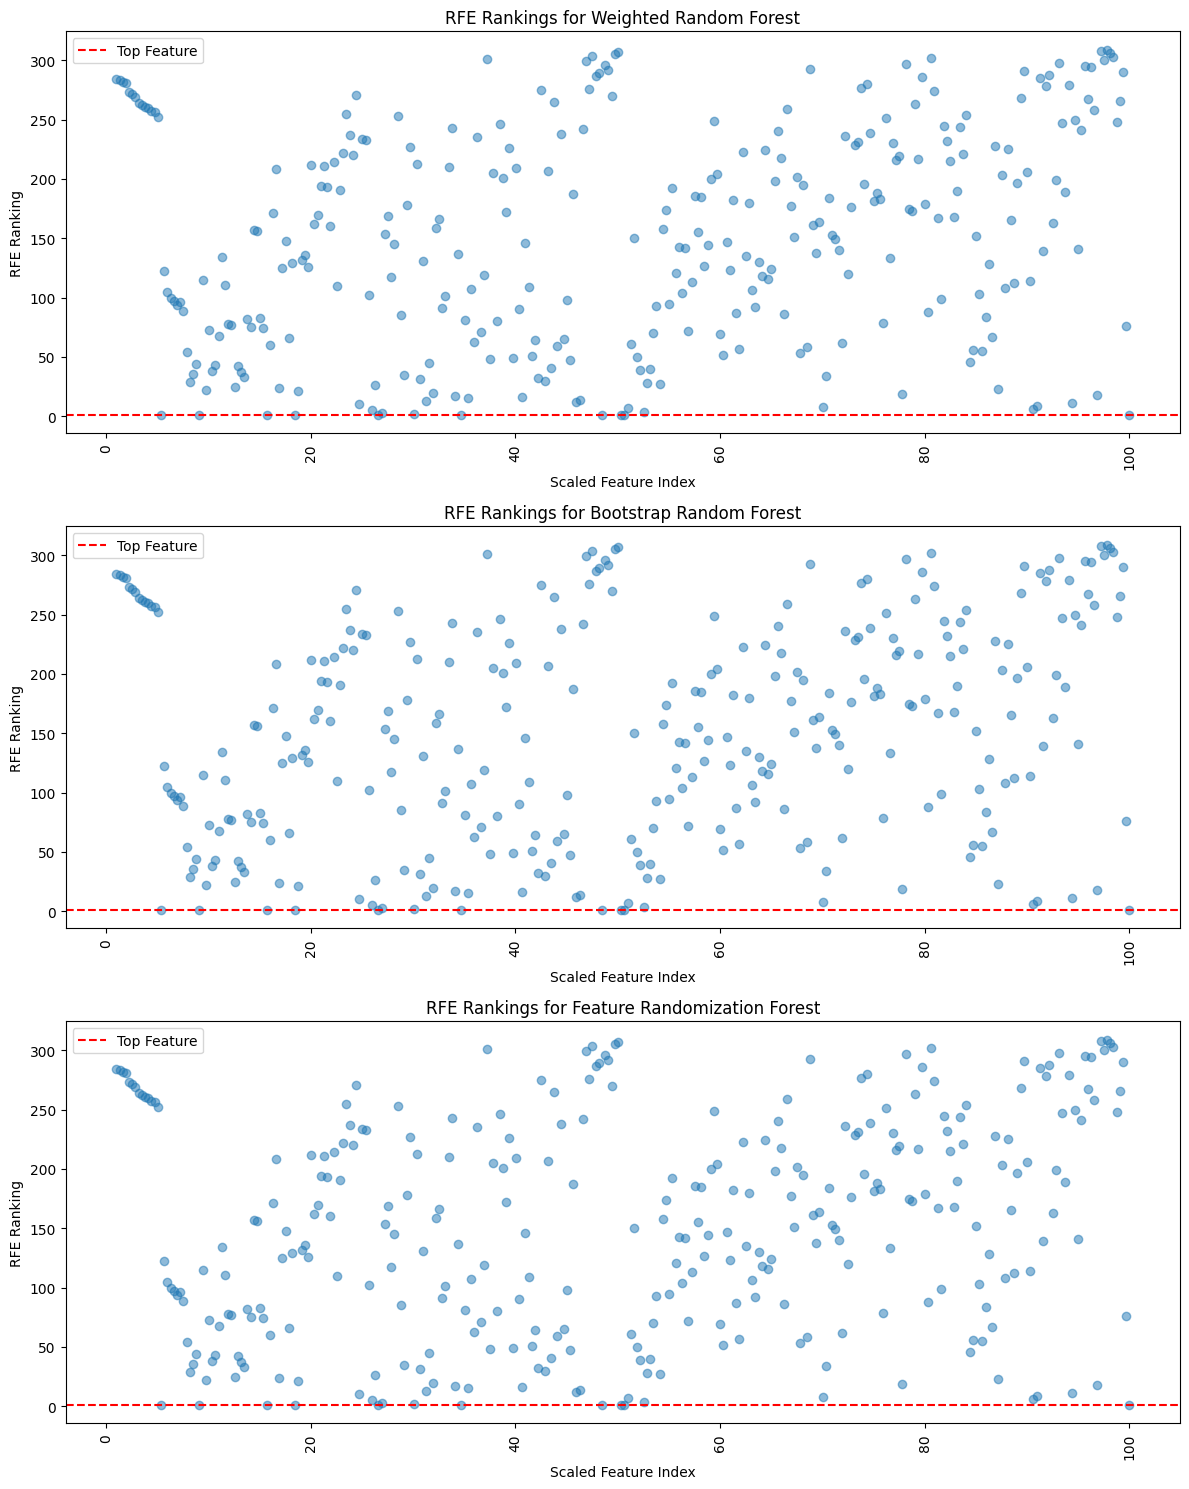

In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold

# 1. Klusterisasi K-Means
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 2. PCA untuk mengurangi dimensi dan visualisasi hasil kluster
pca = PCA(n_components=2)  # Mengurangi ke 2 komponen
X_pca = pca.fit_transform(df_scaled)

# Menampilkan hasil kluster dan komponen PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

X = df[numerical_cols].values
y = df['Cluster'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_weighted_random_forest(weights):
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight=weights,
        random_state=42
    )

def create_bootstrap_random_forest():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        bootstrap=True,
        random_state=42
    )

def create_feature_randomization_forest():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42
    )

models = {
    'Weighted Random Forest': create_weighted_random_forest(weights='balanced'),
    'Bootstrap Random Forest': create_bootstrap_random_forest(),
    'Feature Randomization Forest': create_feature_randomization_forest(),
}

results_df = pd.DataFrame(columns=['Indicator'])

for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train_scaled, y_train)
    rfe_rankings = rfe.ranking_
    model.fit(X_train_scaled, y_train)
    importance_values = model.feature_importances_

    indicator_names = numerical_cols
    model_results_df = pd.DataFrame({
        'Indicator': indicator_names,
        'Coef/Importance': importance_values,
        'RFE Ranking': rfe_rankings,
    })

    model_results_df.rename(columns={'Coef/Importance': f'Coef/Importance ({name})',
                                     'RFE Ranking': f'RFE Ranking ({name})'}, inplace=True)

    if results_df.empty:
        results_df = model_results_df
    else:
        results_df = results_df.merge(model_results_df, on='Indicator', how='outer')

results_df.fillna(0, inplace=True)

evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    accuracies = []
    f1_scores = []
    y_test_bin_list = []
    y_pred_prob_list = []

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_cv_train, X_cv_test = X_train_scaled[train_index], X_train_scaled[test_index]
        y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]

        model.fit(X_cv_train, y_cv_train)
        y_score = model.predict_proba(X_cv_test)
        y_test_bin_list.append(label_binarize(y_cv_test, classes=np.unique(y_train)))
        y_pred_prob_list.append(y_score)

        accuracy = model.score(X_cv_test, y_cv_test)
        accuracies.append(accuracy)

        f1 = cross_val_score(model, X_cv_train, y_cv_train, cv=skf, scoring='f1_macro')
        f1_scores.append(f1.mean())

    accuracy_mean = np.mean(accuracies)
    f1_mean = np.mean(f1_scores)

    model_results = pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy_mean],
        'F1 Score': [f1_mean]
    })
    evaluation_results = pd.concat([evaluation_results, model_results], ignore_index=True)

    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(np.concatenate([yt[:, i] for yt in y_test_bin_list]),
                                np.concatenate([yp[:, i] for yp in y_pred_prob_list]))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {name}')
    plt.legend()
    plt.show()
print(evaluation_results)

# Plot RFE Rankings for each model
plt.figure(figsize=(12, 15))
for i, name in enumerate(models.keys()):
    plt.subplot(len(models), 1, i + 1)
    plt.scatter(np.linspace(1, 100, len(rfe_rankings)), rfe_rankings, alpha=0.5)  # Scale x-axis
    plt.title(f"RFE Rankings for {name}")
    plt.xlabel('Scaled Feature Index')
    plt.ylabel('RFE Ranking')
    plt.xticks(rotation=90)
    plt.axhline(y=1, color='r', linestyle='--', label='Top Feature')
    plt.legend()

plt.tight_layout()
plt.show()

### Test Size 25/75

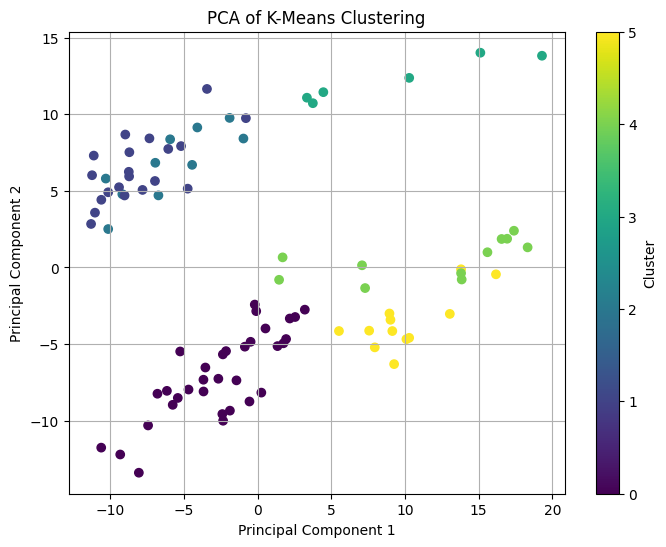

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
<ipython-input-37-667c2e3a77bb>:131: FutureWa

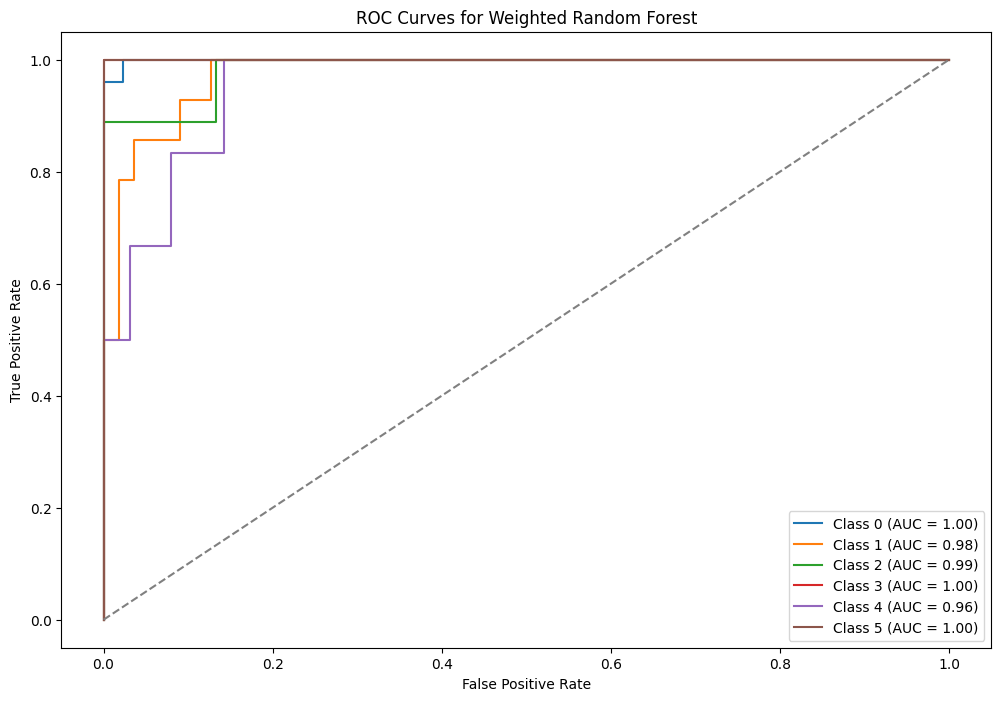

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


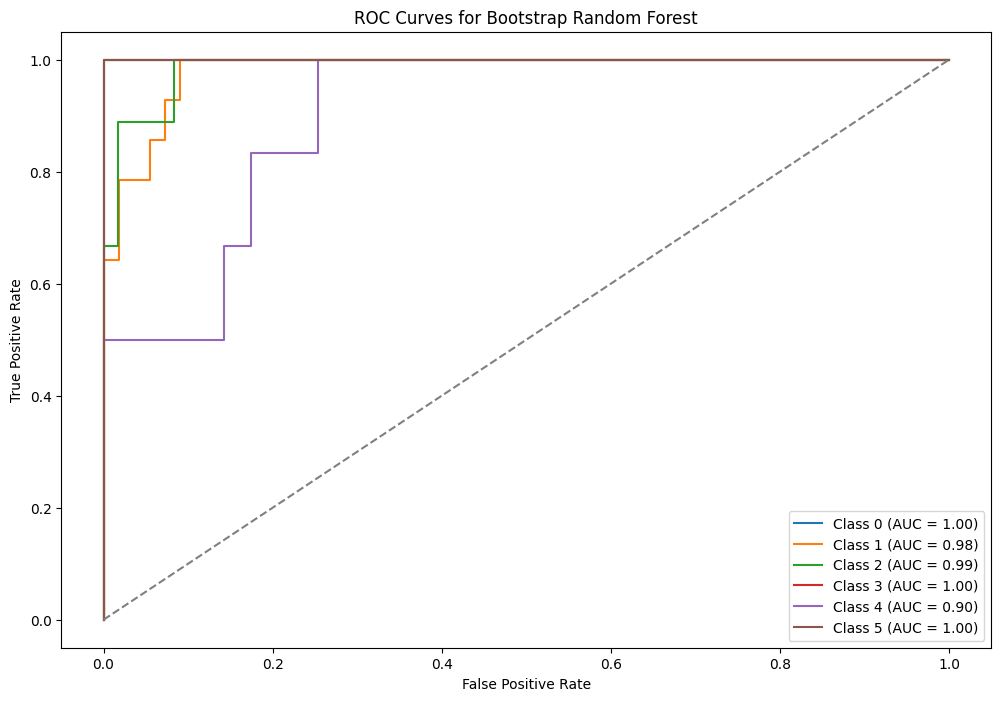

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


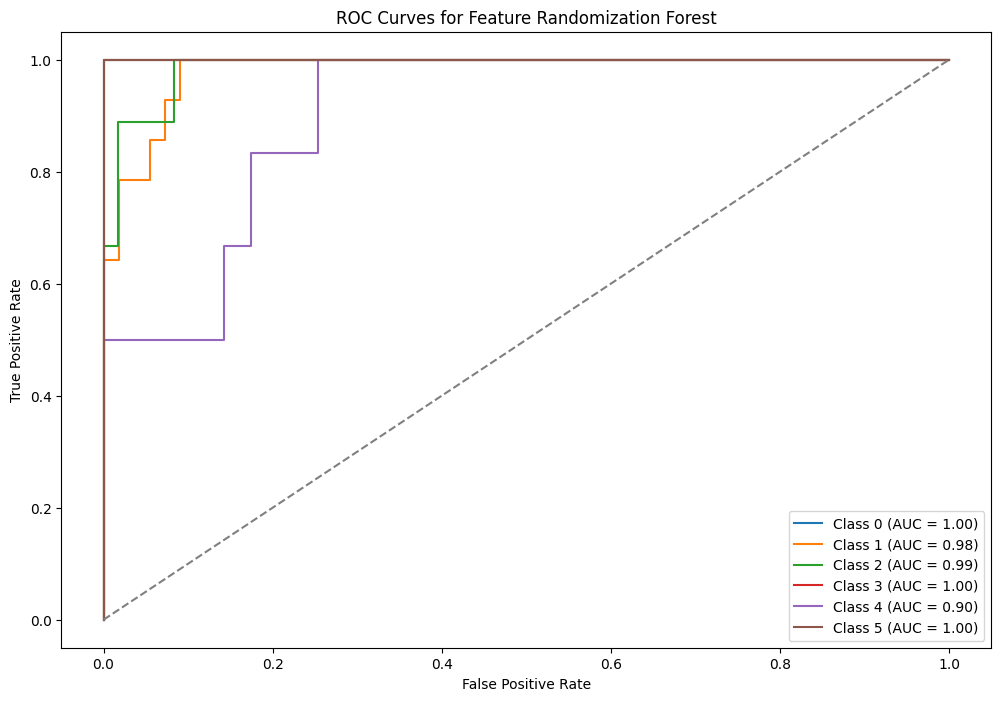

                          Model  Accuracy  F1 Score
0        Weighted Random Forest  0.897802  0.827924
1       Bootstrap Random Forest  0.884615  0.651492
2  Feature Randomization Forest  0.884615  0.651492


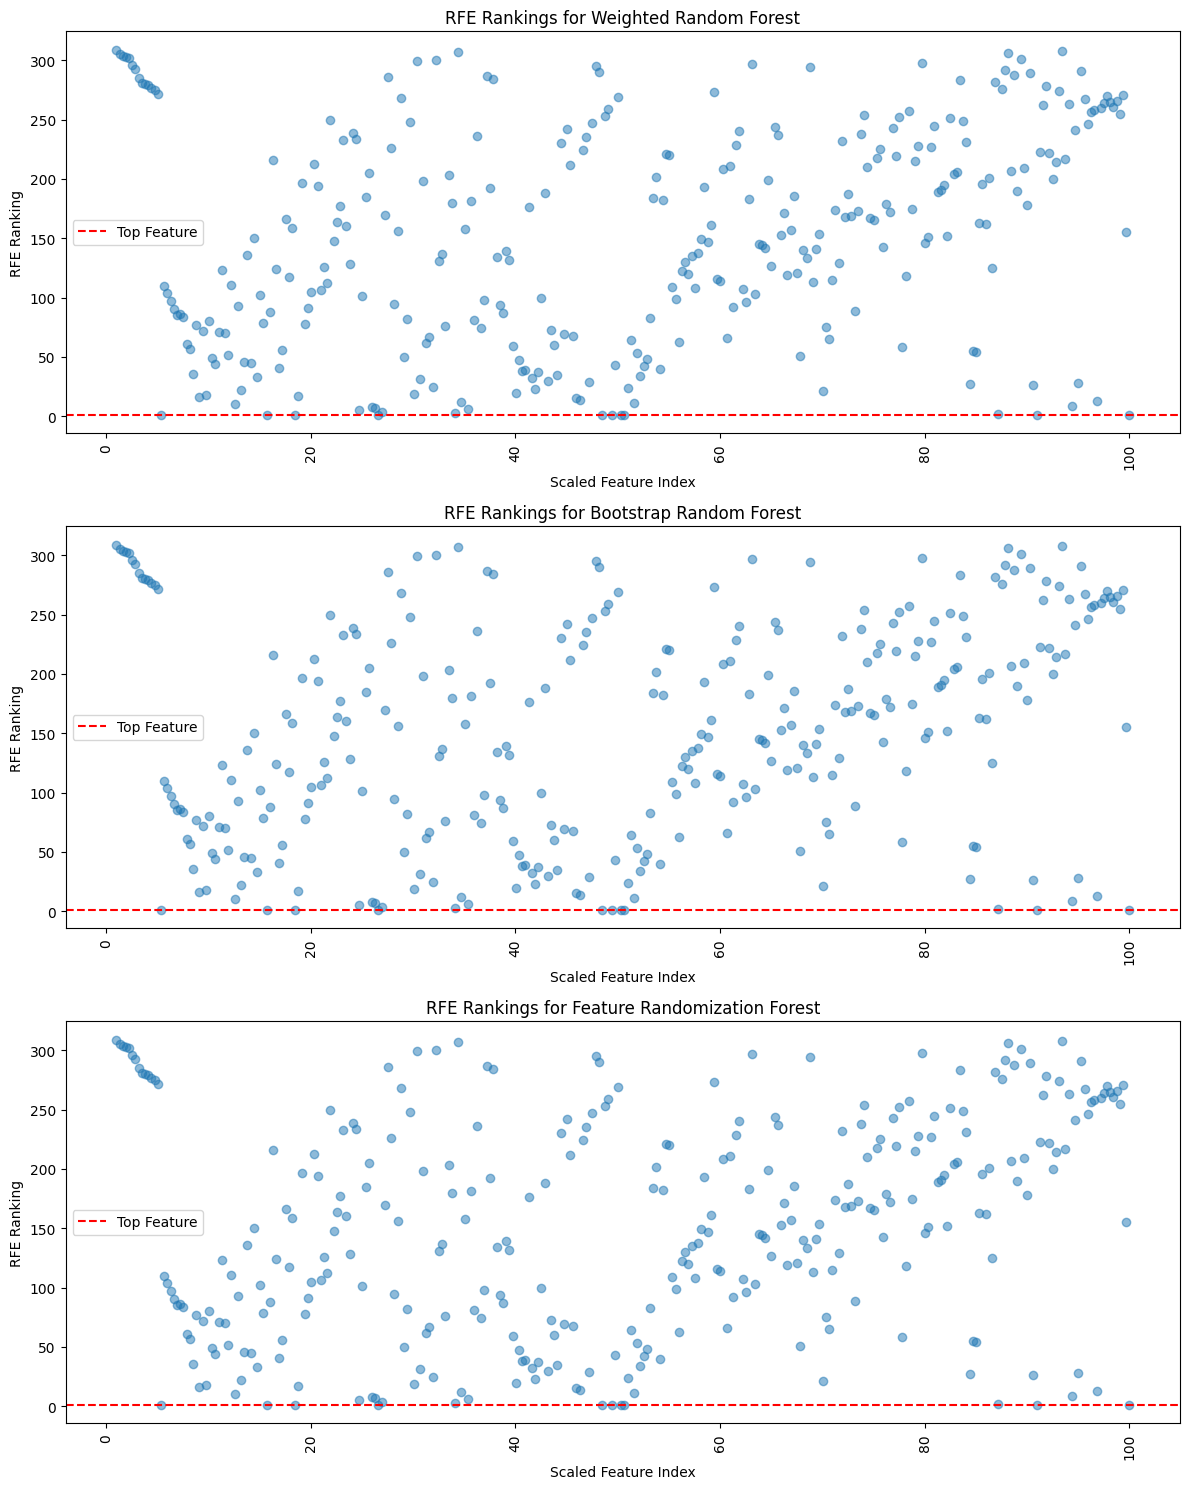

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold

# 1. Klusterisasi K-Means
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 2. PCA untuk mengurangi dimensi dan visualisasi hasil kluster
pca = PCA(n_components=2)  # Mengurangi ke 2 komponen
X_pca = pca.fit_transform(df_scaled)

# Menampilkan hasil kluster dan komponen PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

X = df[numerical_cols].values
y = df['Cluster'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_weighted_random_forest(weights):
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight=weights,
        random_state=42
    )

def create_bootstrap_random_forest():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        bootstrap=True,
        random_state=42
    )

def create_feature_randomization_forest():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42
    )

models = {
    'Weighted Random Forest': create_weighted_random_forest(weights='balanced'),
    'Bootstrap Random Forest': create_bootstrap_random_forest(),
    'Feature Randomization Forest': create_feature_randomization_forest(),
}

results_df = pd.DataFrame(columns=['Indicator'])

for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train_scaled, y_train)
    rfe_rankings = rfe.ranking_
    model.fit(X_train_scaled, y_train)
    importance_values = model.feature_importances_

    indicator_names = numerical_cols
    model_results_df = pd.DataFrame({
        'Indicator': indicator_names,
        'Coef/Importance': importance_values,
        'RFE Ranking': rfe_rankings,
    })

    model_results_df.rename(columns={'Coef/Importance': f'Coef/Importance ({name})',
                                     'RFE Ranking': f'RFE Ranking ({name})'}, inplace=True)

    if results_df.empty:
        results_df = model_results_df
    else:
        results_df = results_df.merge(model_results_df, on='Indicator', how='outer')

results_df.fillna(0, inplace=True)

evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    accuracies = []
    f1_scores = []
    y_test_bin_list = []
    y_pred_prob_list = []

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_cv_train, X_cv_test = X_train_scaled[train_index], X_train_scaled[test_index]
        y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]

        model.fit(X_cv_train, y_cv_train)
        y_score = model.predict_proba(X_cv_test)
        y_test_bin_list.append(label_binarize(y_cv_test, classes=np.unique(y_train)))
        y_pred_prob_list.append(y_score)

        accuracy = model.score(X_cv_test, y_cv_test)
        accuracies.append(accuracy)

        f1 = cross_val_score(model, X_cv_train, y_cv_train, cv=skf, scoring='f1_macro')
        f1_scores.append(f1.mean())

    accuracy_mean = np.mean(accuracies)
    f1_mean = np.mean(f1_scores)

    model_results = pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy_mean],
        'F1 Score': [f1_mean]
    })
    evaluation_results = pd.concat([evaluation_results, model_results], ignore_index=True)

    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(np.concatenate([yt[:, i] for yt in y_test_bin_list]),
                                np.concatenate([yp[:, i] for yp in y_pred_prob_list]))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {name}')
    plt.legend()
    plt.show()
print(evaluation_results)

# Plot RFE Rankings for each model
plt.figure(figsize=(12, 15))
for i, name in enumerate(models.keys()):
    plt.subplot(len(models), 1, i + 1)
    plt.scatter(np.linspace(1, 100, len(rfe_rankings)), rfe_rankings, alpha=0.5)  # Scale x-axis
    plt.title(f"RFE Rankings for {name}")
    plt.xlabel('Scaled Feature Index')
    plt.ylabel('RFE Ranking')
    plt.xticks(rotation=90)
    plt.axhline(y=1, color='r', linestyle='--', label='Top Feature')
    plt.legend()

plt.tight_layout()
plt.show()

### Test Size 30/70

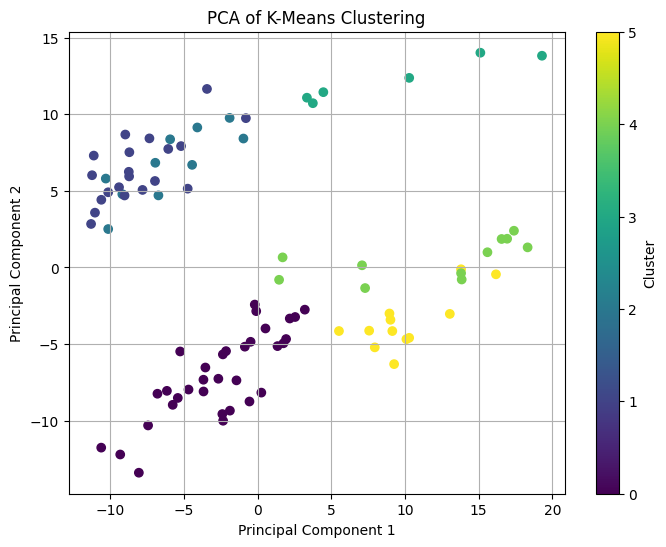

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
<ipython-input-38-7c2fce3e029c>:131: FutureWa

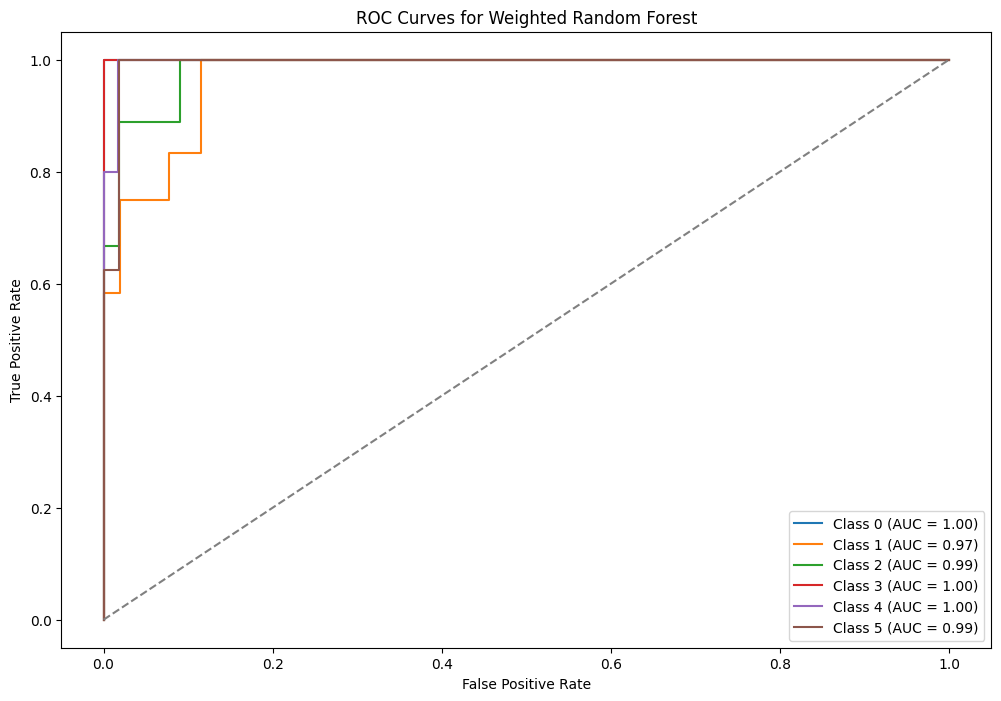

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


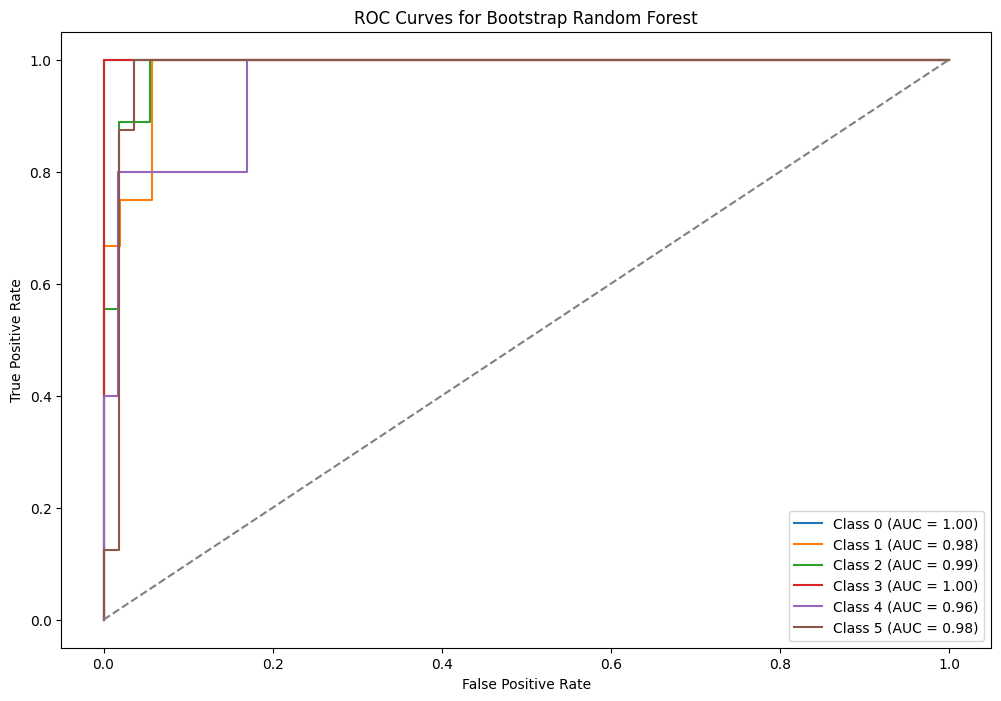

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


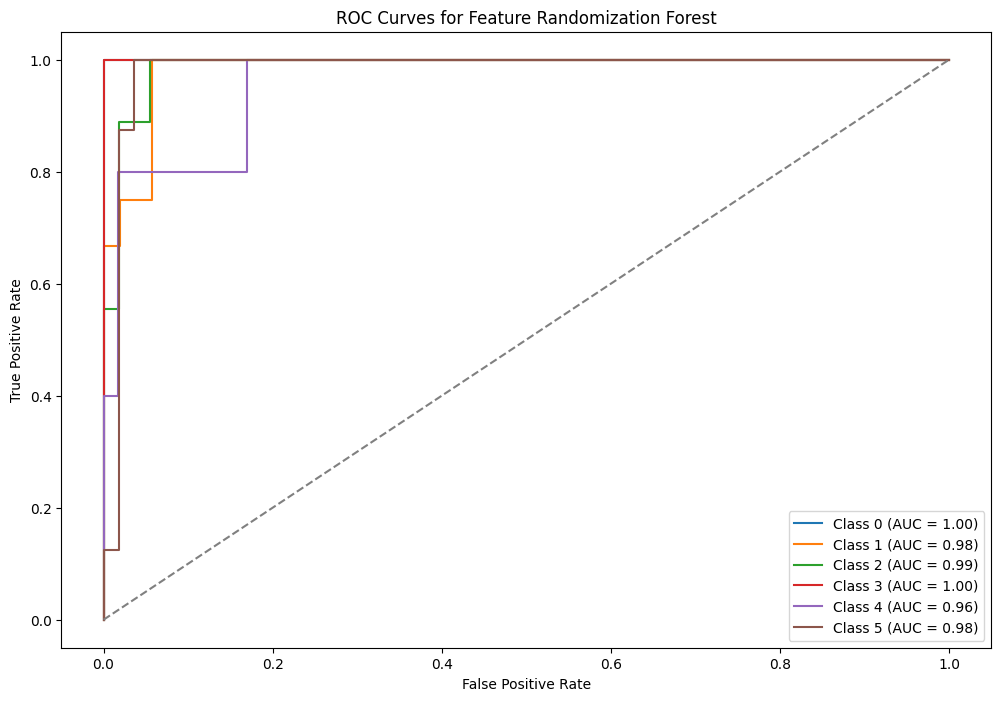

                          Model  Accuracy  F1 Score
0        Weighted Random Forest  0.935897  0.794333
1       Bootstrap Random Forest  0.905128  0.604639
2  Feature Randomization Forest  0.905128  0.604639


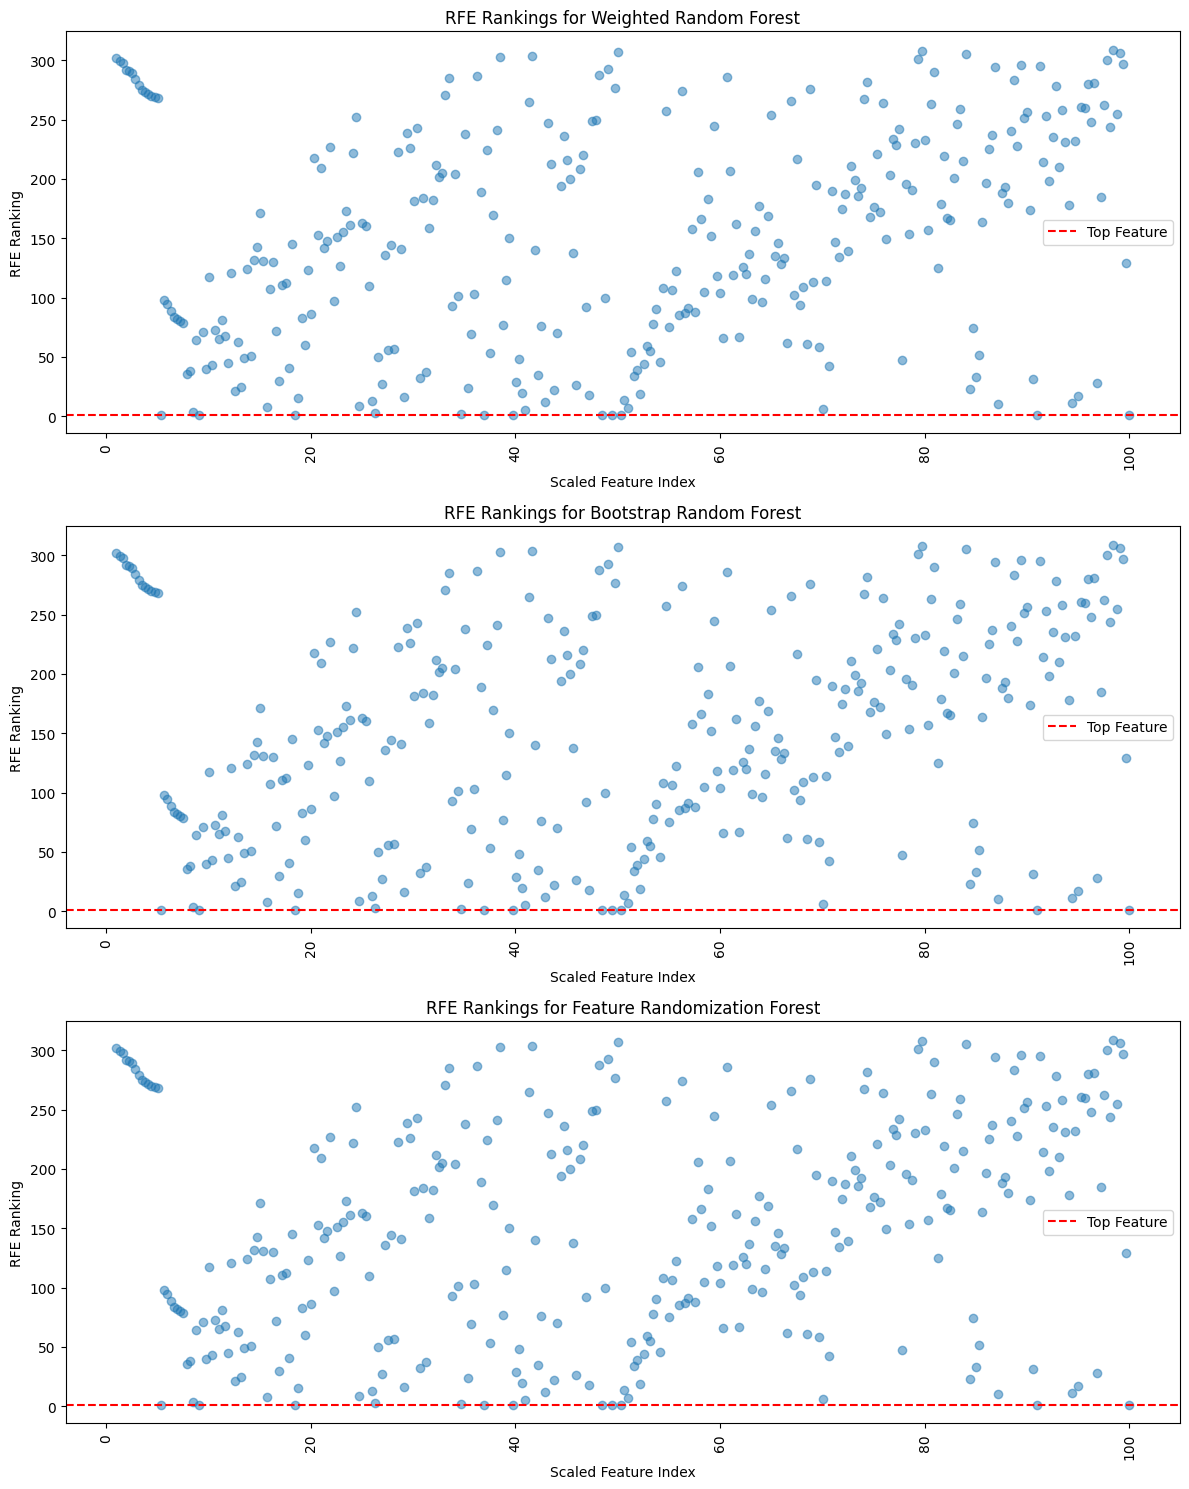

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold

# 1. Klusterisasi K-Means
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 2. PCA untuk mengurangi dimensi dan visualisasi hasil kluster
pca = PCA(n_components=2)  # Mengurangi ke 2 komponen
X_pca = pca.fit_transform(df_scaled)

# Menampilkan hasil kluster dan komponen PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('PCA of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

X = df[numerical_cols].values
y = df['Cluster'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_weighted_random_forest(weights):
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight=weights,
        random_state=42
    )

def create_bootstrap_random_forest():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        bootstrap=True,
        random_state=42
    )

def create_feature_randomization_forest():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42
    )

models = {
    'Weighted Random Forest': create_weighted_random_forest(weights='balanced'),
    'Bootstrap Random Forest': create_bootstrap_random_forest(),
    'Feature Randomization Forest': create_feature_randomization_forest(),
}

results_df = pd.DataFrame(columns=['Indicator'])

for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train_scaled, y_train)
    rfe_rankings = rfe.ranking_
    model.fit(X_train_scaled, y_train)
    importance_values = model.feature_importances_

    indicator_names = numerical_cols
    model_results_df = pd.DataFrame({
        'Indicator': indicator_names,
        'Coef/Importance': importance_values,
        'RFE Ranking': rfe_rankings,
    })

    model_results_df.rename(columns={'Coef/Importance': f'Coef/Importance ({name})',
                                     'RFE Ranking': f'RFE Ranking ({name})'}, inplace=True)

    if results_df.empty:
        results_df = model_results_df
    else:
        results_df = results_df.merge(model_results_df, on='Indicator', how='outer')

results_df.fillna(0, inplace=True)

evaluation_results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    accuracies = []
    f1_scores = []
    y_test_bin_list = []
    y_pred_prob_list = []

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_cv_train, X_cv_test = X_train_scaled[train_index], X_train_scaled[test_index]
        y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]

        model.fit(X_cv_train, y_cv_train)
        y_score = model.predict_proba(X_cv_test)
        y_test_bin_list.append(label_binarize(y_cv_test, classes=np.unique(y_train)))
        y_pred_prob_list.append(y_score)

        accuracy = model.score(X_cv_test, y_cv_test)
        accuracies.append(accuracy)

        f1 = cross_val_score(model, X_cv_train, y_cv_train, cv=skf, scoring='f1_macro')
        f1_scores.append(f1.mean())

    accuracy_mean = np.mean(accuracies)
    f1_mean = np.mean(f1_scores)

    model_results = pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy_mean],
        'F1 Score': [f1_mean]
    })
    evaluation_results = pd.concat([evaluation_results, model_results], ignore_index=True)

    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(np.concatenate([yt[:, i] for yt in y_test_bin_list]),
                                np.concatenate([yp[:, i] for yp in y_pred_prob_list]))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {name}')
    plt.legend()
    plt.show()
print(evaluation_results)

# Plot RFE Rankings for each model
plt.figure(figsize=(12, 15))
for i, name in enumerate(models.keys()):
    plt.subplot(len(models), 1, i + 1)
    plt.scatter(np.linspace(1, 100, len(rfe_rankings)), rfe_rankings, alpha=0.5)  # Scale x-axis
    plt.title(f"RFE Rankings for {name}")
    plt.xlabel('Scaled Feature Index')
    plt.ylabel('RFE Ranking')
    plt.xticks(rotation=90)
    plt.axhline(y=1, color='r', linestyle='--', label='Top Feature')
    plt.legend()

plt.tight_layout()
plt.show()

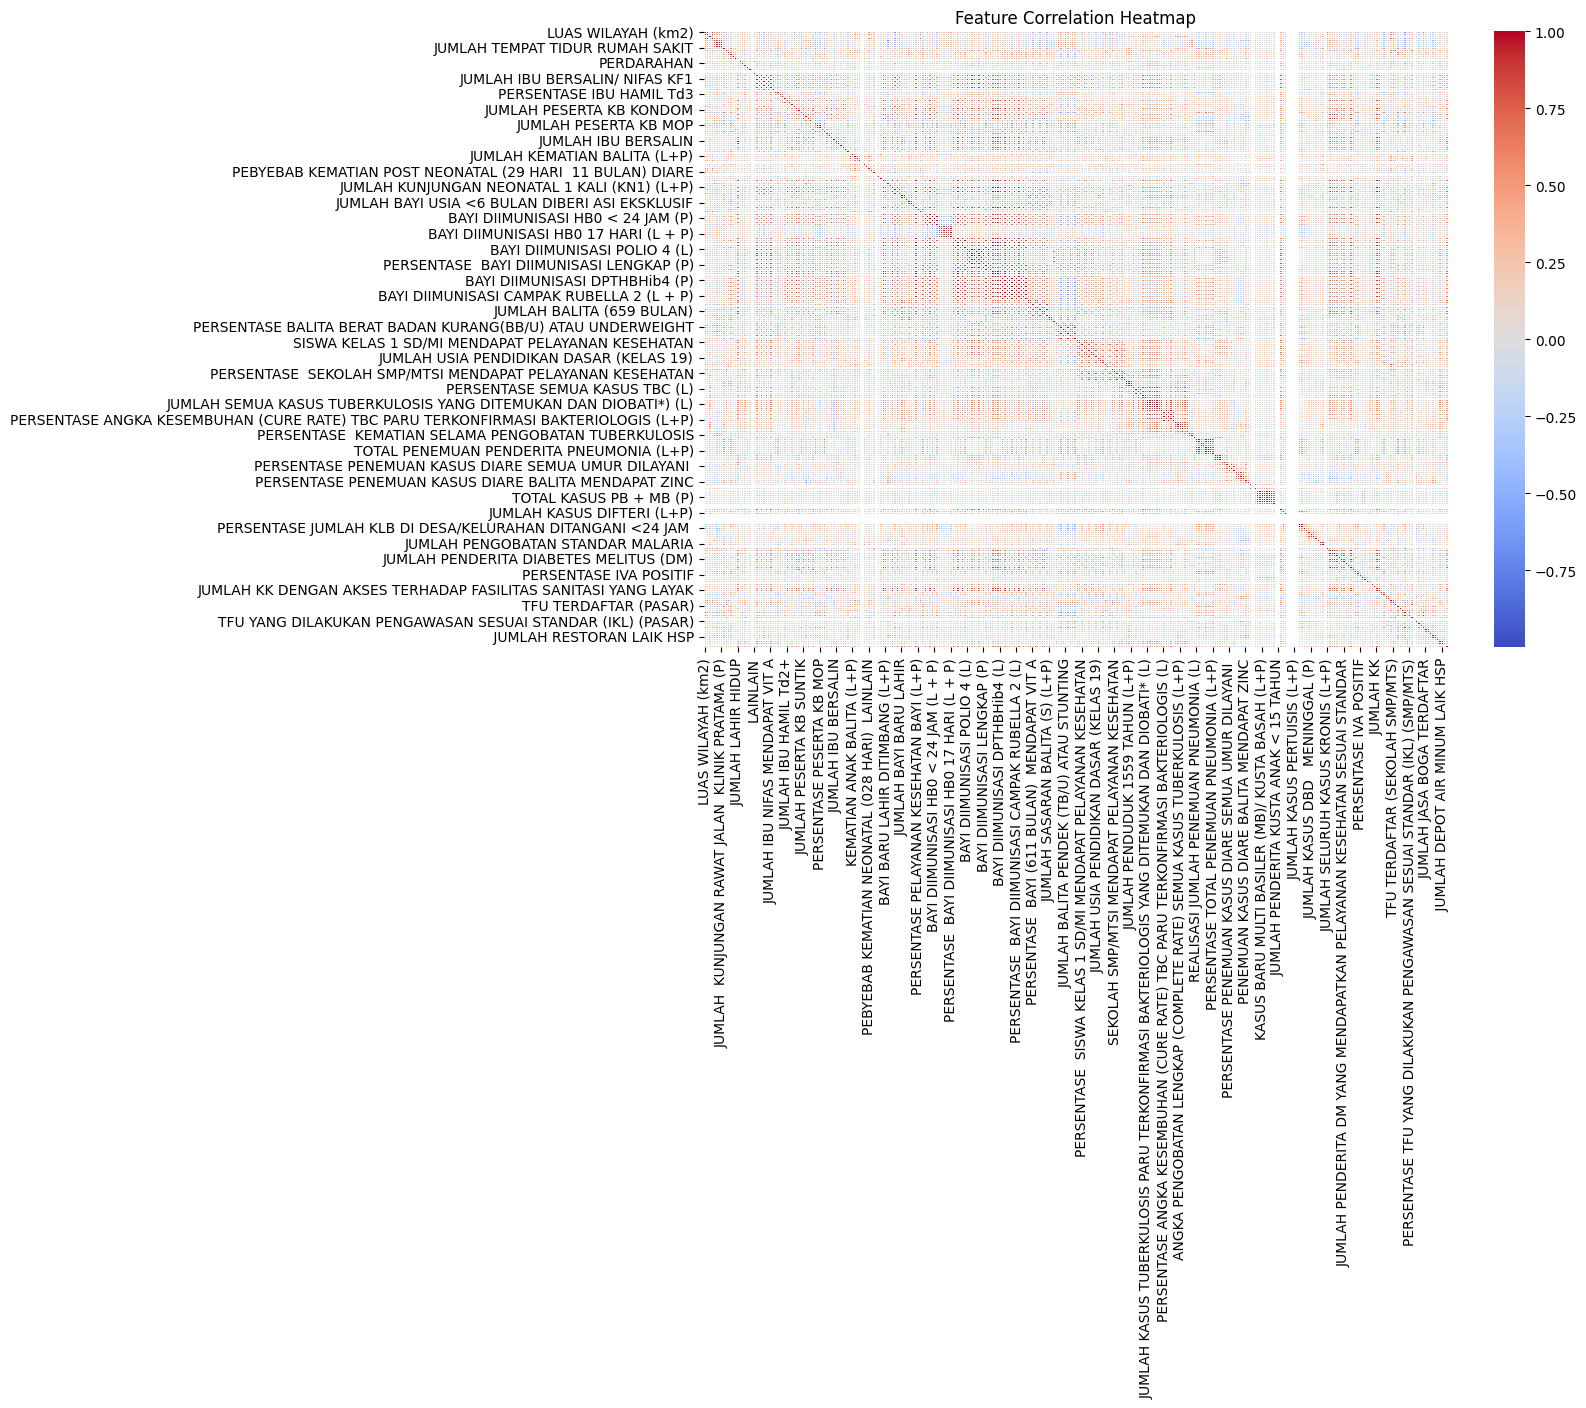

In [39]:
# Pastikan numerical_cols sudah diambil dari dataset
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Mendefinisikan X_numerical berdasarkan kolom numerik
X_numerical = df[numerical_cols].values

# Membuat correlation matrix
correlation_matrix = pd.DataFrame(X_numerical, columns=numerical_cols).corr()

# Plot heatmap dengan pengaturan tambahan
plt.figure(figsize=(12, 8), dpi=100)  # Tambahkan dpi untuk resolusi lebih baik
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)  # Tambahkan linewidths untuk garis antar sel
plt.title('Feature Correlation Heatmap')
plt.show()
